### Keras

`Keras(케라스)`는 파이썬으로 구현된 쉽고 간결한 딥러닝라이브러이다. 딥러닝 비전문가라도 손쉽게 딥러닝 모델을 개발하고 활용할 수 있도록 케라스는 직관적인 API를 제공하고 있다.
내부적으로 텐서플로우, 티아노(Theano), CNKT등의 딥러닝 전용엔진이 구동되지만 케라스 사용자는 복잡한 내부엔진을 알 필요는 없다. 직관적인 API로 쉽게 다층퍼셉트론모델, CNN(컨볼루션신경망모델), RNN(순환신경망모델) 또는 이를 조합한 모델은 물론 다중입력 또는 다중출력등 다양한 구성을 할 수가 있다.

#### 1. 케라스의 개요
* 파이썬으로 구현된 쉽고 간결한 딥러닝라이브러리
* 구글엔지니어인 `프랑소와숄레` 2015.03월에 발표
* 내부적으로는 텐서플로우엔진이 구동되지만 직관적인 API로 쉽게 딥러닝을 실험할 수 있다.
* 참고사이트 : http://keras.io

#### 2. 케라스의 특징
* 모듈화(Modularity) : 독립적인 모듈을 조합하여 구현
* 최소주의(Minialism) : 각 모듈은 짧고 간결

#### 3. 케라스를 이용한 실습절차

1. 데이터생성
 - 데이터로부너 학습용,검증용 데이터셋을 구분
 - 딥러닝 모델의 학습 및 검증을 할 수 있도록 케라스에서 요구한 형태로 변환을 해야 한다.
2. 모델생성
 - Sequence모델을 생성한 후 필요한 Layer를 추가하여 구성
3. 모델학습과정설정
 - 손실함수 및 최적화방법을 정의
 - 모델컴파일
4. 모델학습
 - 학습용데이터셋을 이용하여 모델을 학습
5. 학습과정을 출력
 - 학습시 학습용, 검증용 데이터셋의 손힐 및 정확도 측정
6. 모델평가
 - 검증용 데이터셋으로 학습한 모델을 평가
7. 새로운 데이터를 사용하여 값을 예측

#### 4. keras설치
>conda intall keras

#### 5. Optimizer 계보
<img src="./images/31.딥러닝_keras_01.JPG" width="500" height="400">
<img src="./images/31.딥러닝_keras_02.JPG" width="600" height="600">

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False

##### A. 회귀분석
###### 실습 1. 케라스기반회귀분석 
* 체중과 나이를 활용한 당뇨수치 예측
* 데이터셋 : https://github.com/PinkWink/FastCampus/blob/master/data/x09.txt

In [2]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [3]:
np.random.seed(7)
data = np.genfromtxt('../data/deeplearning/x09.txt', skip_header=36) # 36행까지 제외
type(data)
data

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.],
       [ 11.,   1.,  27.,  24., 209.],
       [ 12.,   1.,  89.,  31., 290.],
       [ 13.,   1.,  65.,  52., 346.],
       [ 14.,   1.,  57.,  23., 254.],
       [ 15.,   1.,  59.,  60., 395.],
       [ 16.,   1.,  69.,  48., 434.],
       [ 17.,   1.,  60.,  34., 220.],
       [ 18.,   1.,  79.,  51., 374.],
       [ 19.,   1.,  75.,  50., 308.],
       [ 20.,   1.,  82.,  34., 220.],
       [ 21.,   1.,  59.,  46., 311.],
       [ 22.,   1.,  67.,  23., 181.],
       [ 23.,   1.,  85.,  37., 274.],
       [ 24.,   1.,  55.,  40., 303.],
       [ 25.,   1.,  63.,  30., 244.]])

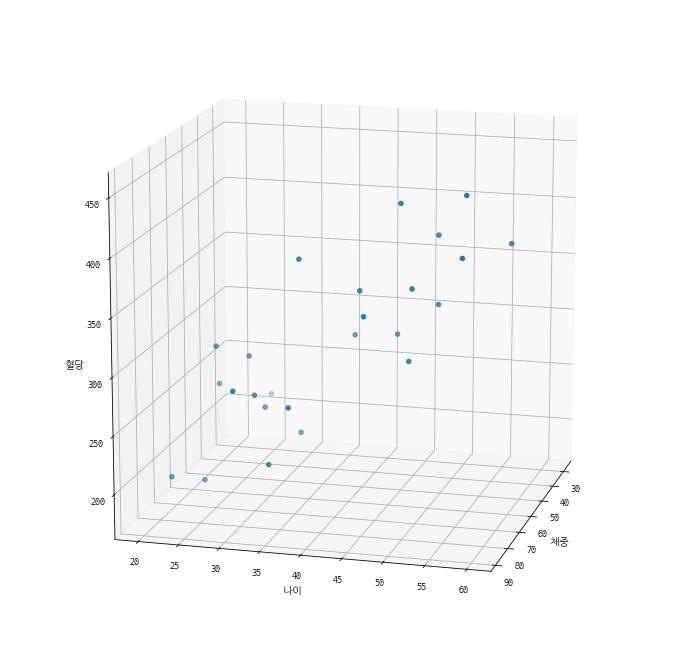

In [4]:
xs = np.array(data[:,2], dtype=np.float32) # 체중
ys = np.array(data[:,3], dtype=np.float32) # 나이
zs = np.array(data[:,4], dtype=np.float32) # 혈당

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs)
ax.set_xlabel('체중')
ax.set_ylabel('나이')
ax.set_zlabel('혈당')
ax.view_init(15,15)
plt.show()

In [5]:
# step1. 데이터를 케라스에 맞게 변환 (종속변수와 독립변수)
x_data = np.array(data[:,2:4], dtype=np.float32)  # 독립변수(체중과 나이)
y_data = np.array(data[:,4], dtype=np.float32)  # 종속변수(혈당)
x_data
y_data

array([354., 190., 405., 263., 451., 302., 288., 385., 402., 365., 209.,
       290., 346., 254., 395., 434., 220., 374., 308., 220., 311., 181.,
       274., 303., 244.], dtype=float32)

In [6]:
# step2. 회귀분석모델생성 (Optimizer는 RMSprop)
rmsprop = RMSprop(lr=0.01) # 학습률 lr=0.01
model = Sequential()
model.add(Dense(1, input_shape=(2,))) # 2는 변수가 2개(체중, 나이), 콤마(,)의 의미는 차원
model.compile(loss='mse', optimizer=rmsprop)
# 손실함수 : 인공신경망에서 학습을 통해 최적의 가중치를 매개변수로 결정하기 위한 기준으로 사용하는 함수
# 손실함수의 결과값을 가장 작게 만드는 것이 신경망학습의 모표이다.
# 손실함수의 결과값을 작게 만들기 위해 가중치매개변수를 조절해 가는 과정이 학습과정이다.
# 평균제곱오차(MSE, Mean Squared Error) : 회귀분석에서 많이 사용하는 손실함수
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
# step3. 학습
hist = model.fit(x_data, y_data, epochs=1000, verbose=1) # verbose=1 학습단계출력여부 옵션

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
25/25 [==============================] - 0s 2ms/step - loss: 69871.0938
Epoch 2/1000
25/25 [==============================] - 0s 40us/step - loss: 68076.3672
Epoch 3/1000
25/25 [==============================] - 0s 40us/step - loss: 66797.8984
Epoch 4/1000
25/25 [==============================] - 0s 40us/step - loss: 65741.3125
Epoch 5/1000
25/25 [==============================] - 0s 40us/step - loss: 64813.5156
Epoch 6/1000
25/25 [==============================] - 0s 0us/step - loss: 63971.3984
Epoch 7/1000
25/25 [==============================] - 0s 40us/step - loss: 63191.0039
Epoch 8/1000
25/25 [==============================] - 0s 40us/step - loss: 62457.4297
Epoch 9/1000
25/25 [==============================] - 0s 40us/step - loss: 61760.7031
Epoch 10/1000
25/25 [==============================] - 0s 0us/step - loss: 61093.8164
Epoch 11/1000
25/25 [==============================] - 0s 40us/step - loss: 60451.5938
Epoch 1

Epoch 93/1000
25/25 [==============================] - 0s 0us/step - loss: 25900.5625
Epoch 94/1000
25/25 [==============================] - 0s 0us/step - loss: 25587.4121
Epoch 95/1000
25/25 [==============================] - 0s 0us/step - loss: 25276.5430
Epoch 96/1000
25/25 [==============================] - 0s 40us/step - loss: 24967.9609
Epoch 97/1000
25/25 [==============================] - 0s 80us/step - loss: 24661.6523
Epoch 98/1000
25/25 [==============================] - 0s 40us/step - loss: 24357.6309
Epoch 99/1000
25/25 [==============================] - 0s 40us/step - loss: 24055.8848
Epoch 100/1000
25/25 [==============================] - 0s 40us/step - loss: 23756.4199
Epoch 101/1000
25/25 [==============================] - 0s 0us/step - loss: 23459.2305
Epoch 102/1000
25/25 [==============================] - 0s 0us/step - loss: 23164.3145
Epoch 103/1000
25/25 [==============================] - 0s 40us/step - loss: 22871.6719
Epoch 104/1000
25/25 [======================

Epoch 187/1000
25/25 [==============================] - 0s 40us/step - loss: 6228.3057
Epoch 188/1000
25/25 [==============================] - 0s 40us/step - loss: 6121.5044
Epoch 189/1000
25/25 [==============================] - 0s 80us/step - loss: 6016.7368
Epoch 190/1000
25/25 [==============================] - 0s 40us/step - loss: 5913.9951
Epoch 191/1000
25/25 [==============================] - 0s 40us/step - loss: 5813.2754
Epoch 192/1000
25/25 [==============================] - 0s 40us/step - loss: 5714.5708
Epoch 193/1000
25/25 [==============================] - 0s 0us/step - loss: 5617.8730
Epoch 194/1000
25/25 [==============================] - 0s 40us/step - loss: 5523.1738
Epoch 195/1000
25/25 [==============================] - 0s 40us/step - loss: 5430.4717
Epoch 196/1000
25/25 [==============================] - 0s 40us/step - loss: 5339.7515
Epoch 197/1000
25/25 [==============================] - 0s 40us/step - loss: 5251.0107
Epoch 198/1000
25/25 [======================

Epoch 282/1000
25/25 [==============================] - 0s 40us/step - loss: 2822.1128
Epoch 283/1000
25/25 [==============================] - 0s 0us/step - loss: 2815.1348
Epoch 284/1000
25/25 [==============================] - 0s 0us/step - loss: 2808.1157
Epoch 285/1000
25/25 [==============================] - 0s 0us/step - loss: 2801.0613
Epoch 286/1000
25/25 [==============================] - 0s 40us/step - loss: 2793.9768
Epoch 287/1000
25/25 [==============================] - 0s 40us/step - loss: 2786.8701
Epoch 288/1000
25/25 [==============================] - 0s 40us/step - loss: 2779.7441
Epoch 289/1000
25/25 [==============================] - 0s 40us/step - loss: 2772.6052
Epoch 290/1000
25/25 [==============================] - 0s 40us/step - loss: 2765.4568
Epoch 291/1000
25/25 [==============================] - 0s 40us/step - loss: 2758.3047
Epoch 292/1000
25/25 [==============================] - 0s 40us/step - loss: 2751.1526
Epoch 293/1000
25/25 [========================

Epoch 377/1000
25/25 [==============================] - 0s 40us/step - loss: 2247.1030
Epoch 378/1000
25/25 [==============================] - 0s 0us/step - loss: 2242.6335
Epoch 379/1000
25/25 [==============================] - 0s 80us/step - loss: 2237.9285
Epoch 380/1000
25/25 [==============================] - 0s 40us/step - loss: 2233.3674
Epoch 381/1000
25/25 [==============================] - 0s 40us/step - loss: 2228.8267
Epoch 382/1000
25/25 [==============================] - 0s 40us/step - loss: 2224.3604
Epoch 383/1000
25/25 [==============================] - 0s 40us/step - loss: 2219.9138
Epoch 384/1000
25/25 [==============================] - 0s 40us/step - loss: 2215.5073
Epoch 385/1000
25/25 [==============================] - 0s 40us/step - loss: 2211.1191
Epoch 386/1000
25/25 [==============================] - 0s 40us/step - loss: 2206.7639
Epoch 387/1000
25/25 [==============================] - 0s 40us/step - loss: 2202.4290
Epoch 388/1000
25/25 [======================

Epoch 472/1000
25/25 [==============================] - 0s 40us/step - loss: 1939.4391
Epoch 473/1000
25/25 [==============================] - 0s 0us/step - loss: 1937.5300
Epoch 474/1000
25/25 [==============================] - 0s 40us/step - loss: 1935.6770
Epoch 475/1000
25/25 [==============================] - 0s 40us/step - loss: 1933.8215
Epoch 476/1000
25/25 [==============================] - 0s 40us/step - loss: 1932.0228
Epoch 477/1000
25/25 [==============================] - 0s 40us/step - loss: 1930.2206
Epoch 478/1000
25/25 [==============================] - 0s 40us/step - loss: 1928.4747
Epoch 479/1000
25/25 [==============================] - 0s 40us/step - loss: 1926.7253
Epoch 480/1000
25/25 [==============================] - 0s 40us/step - loss: 1925.0317
Epoch 481/1000
25/25 [==============================] - 0s 40us/step - loss: 1923.3345
Epoch 482/1000
25/25 [==============================] - 0s 40us/step - loss: 1921.6936
Epoch 483/1000
25/25 [======================

Epoch 567/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.9867
Epoch 568/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.9111
Epoch 569/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.8339
Epoch 570/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.7638
Epoch 571/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.6920
Epoch 572/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.6268
Epoch 573/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.5598
Epoch 574/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.4979
Epoch 575/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.4354
Epoch 576/1000
25/25 [==============================] - 0s 0us/step - loss: 1862.3772
Epoch 577/1000
25/25 [==============================] - 0s 40us/step - loss: 1862.3175
Epoch 578/1000
25/25 [======================

Epoch 662/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.7578
Epoch 663/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.7175
Epoch 664/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6796
Epoch 665/1000
25/25 [==============================] - 0s 0us/step - loss: 1858.6390
Epoch 666/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.6010
Epoch 667/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5604
Epoch 668/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.5225
Epoch 669/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4823
Epoch 670/1000
25/25 [==============================] - 0s 39us/step - loss: 1858.4446
Epoch 671/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.4042
Epoch 672/1000
25/25 [==============================] - 0s 40us/step - loss: 1858.3662
Epoch 673/1000
25/25 [======================

Epoch 757/1000
25/25 [==============================] - 0s 40us/step - loss: 1855.0620
Epoch 758/1000
25/25 [==============================] - 0s 40us/step - loss: 1855.0244
Epoch 759/1000
25/25 [==============================] - 0s 80us/step - loss: 1854.9849
Epoch 760/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9470
Epoch 761/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.9075
Epoch 762/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.8699
Epoch 763/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.8304
Epoch 764/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7930
Epoch 765/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7533
Epoch 766/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.7159
Epoch 767/1000
25/25 [==============================] - 0s 40us/step - loss: 1854.6763
Epoch 768/1000
25/25 [=====================

Epoch 852/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.4203
Epoch 853/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.3806
Epoch 854/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.3436
Epoch 855/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.3051
Epoch 856/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2678
Epoch 857/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.2284
Epoch 858/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.1915
Epoch 859/1000
25/25 [==============================] - 0s 0us/step - loss: 1851.1523
Epoch 860/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.1154
Epoch 861/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0765
Epoch 862/1000
25/25 [==============================] - 0s 40us/step - loss: 1851.0389
Epoch 863/1000
25/25 [=======================

Epoch 947/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.8264
Epoch 948/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7898
Epoch 949/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7516
Epoch 950/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.7148
Epoch 951/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6758
Epoch 952/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.6396
Epoch 953/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.6014
Epoch 954/1000
25/25 [==============================] - 0s 0us/step - loss: 1847.5648
Epoch 955/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.5261
Epoch 956/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4901
Epoch 957/1000
25/25 [==============================] - 0s 40us/step - loss: 1847.4513
Epoch 958/1000
25/25 [========================

In [8]:
print(dir(hist))
print(hist.history.keys())

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'epoch', 'history', 'model', 'on_batch_begin', 'on_batch_end', 'on_epoch_begin', 'on_epoch_end', 'on_predict_batch_begin', 'on_predict_batch_end', 'on_predict_begin', 'on_predict_end', 'on_test_batch_begin', 'on_test_batch_end', 'on_test_begin', 'on_test_end', 'on_train_batch_begin', 'on_train_batch_end', 'on_train_begin', 'on_train_end', 'params', 'set_model', 'set_params', 'validation_data']
dict_keys(['loss'])


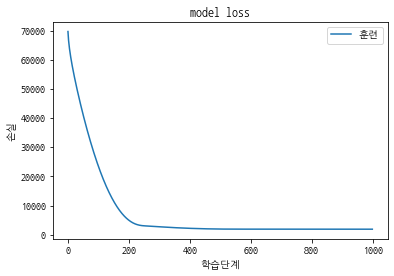

In [9]:
# step4. 학습결과 시각화
plt.plot(hist.history['loss'])
plt.title("model loss")
plt.xlabel("학습단계")
plt.ylabel("손실")
plt.legend(['훈련'], loc='upper right')
plt.show()

In [10]:
# step5. 예측(새로운 데이터)
print(model.predict(np.array([100, 40]).reshape(1,2))) # 체중 100kg, 나이 40세
print(model.predict(np.array([60, 40]).reshape(1,2))) # 체중 60kg, 나이 40세
print(model.predict(np.array([60, 59]).reshape(1,2))) # 체중 60kg, 나이 59세

[[350.51718]]
[[302.75726]]
[[408.08386]]


In [11]:
# step6. 회귀선 : 가중치(기울기, weight) 와 절편(편향, bais)
w, b = model.get_weights()
w, b

x = np.linspace(20, 100, 50).reshape(50,1) # 예상체중
y = np.linspace(10, 70, 50).reshape(50,1)  # 예상나이
xy = np.concatenate((x,y), axis=1)
type(xy)
print(xy)
# 행렬곱셈
z = np.matmul(xy, w) + b # y = wx + b
print(z)

[[ 20.          10.        ]
 [ 21.63265306  11.2244898 ]
 [ 23.26530612  12.44897959]
 [ 24.89795918  13.67346939]
 [ 26.53061224  14.89795918]
 [ 28.16326531  16.12244898]
 [ 29.79591837  17.34693878]
 [ 31.42857143  18.57142857]
 [ 33.06122449  19.79591837]
 [ 34.69387755  21.02040816]
 [ 36.32653061  22.24489796]
 [ 37.95918367  23.46938776]
 [ 39.59183673  24.69387755]
 [ 41.2244898   25.91836735]
 [ 42.85714286  27.14285714]
 [ 44.48979592  28.36734694]
 [ 46.12244898  29.59183673]
 [ 47.75510204  30.81632653]
 [ 49.3877551   32.04081633]
 [ 51.02040816  33.26530612]
 [ 52.65306122  34.48979592]
 [ 54.28571429  35.71428571]
 [ 55.91836735  36.93877551]
 [ 57.55102041  38.16326531]
 [ 59.18367347  39.3877551 ]
 [ 60.81632653  40.6122449 ]
 [ 62.44897959  41.83673469]
 [ 64.08163265  43.06122449]
 [ 65.71428571  44.28571429]
 [ 67.34693878  45.51020408]
 [ 68.97959184  46.73469388]
 [ 70.6122449   47.95918367]
 [ 72.24489796  49.18367347]
 [ 73.87755102  50.40816327]
 [ 75.51020408

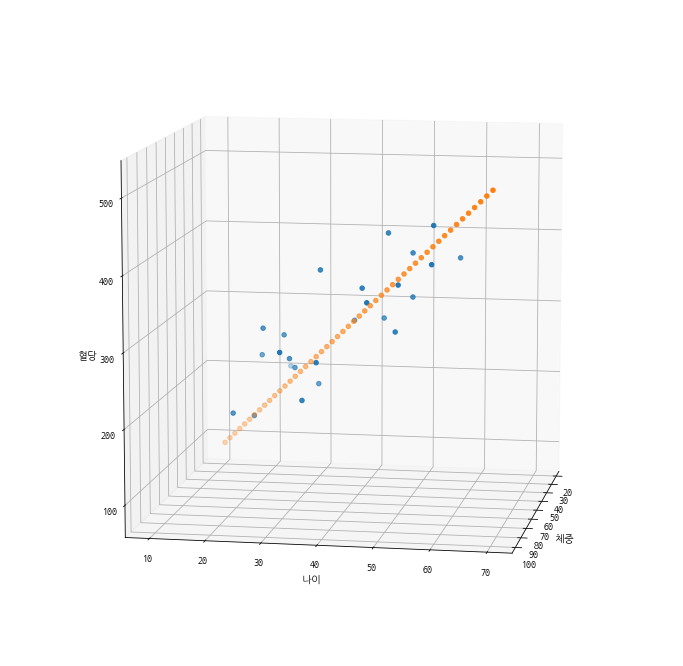

In [12]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zs) # 산점도
ax.scatter(x, y, z) # 회귀선
ax.set_xlabel("체중")
ax.set_ylabel("나이")
ax.set_zlabel("혈당")
ax.view_init(10,10)
plt.show()

###### 실습 2. 케라스기반회귀분석 
* 회귀분석 : 연속적인 값을 예측(예: 과거 기상데이터를 입력해서 내일의 날씨를 예측)
* 주택가격 데이터셋을 사용한 주택가격예측(회귀분석)
* 보스턴주택가격 데이터셋 : 1970년대 중반 보스턴외곽지역의 범죄율, 지방세율등의 데이터로 주택가격예측
 - 샘플데이터 506 : 학습용 404, 검증용 102

In [13]:
from keras.datasets import boston_housing # 다운폴더 : 사용자계정/.keras/datasets/boston_housing.npz
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data() # 80:20 분할
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


In [14]:
# 데이터정제
# 변수들이 서로 상이한 스케일을 가졌기 때문에 데이터를 그대로 사용할 경우 예측정확도가 떨어질 수 있다.
# 데이터정규화 : 각 변수에 대해서 표준편차가 1이 되도록 평균을 뺴고 표준편차로 나눈다.

# 평균값을 빼고
mean = train_data.mean(axis=0)
train_data -= mean
# 표준편차로 나누기
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

###### 활성화함수(Activation Function)

<img src="./images/31.딥러닝_keras_04.JPG" width="500" height="400">

In [15]:
# 활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어 내는 함수
# 프로세스 : input data -> {activation function} -> output data
# 활성화함수의 종류 : 탄젠트(tanh)함수, 시스모이드(sigmoid)함수, ReLU함수
# tanh, sigmoid함수보다 학습시간이 빠르고 성능이 좋아서 최근에는 ReLU(Recitifed Linear Unit)가 많이 사용되고 있다.
from keras import models
from keras import layers

# 64개의 노드를 가진 2개의 은닉층 신경망 모델
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],))) # 은닉층 1
    model.add(layers.Dense(64, activation='relu')) # 은닉층 2
    model.add(layers.Dense(1)) # 출력층
    # mse : 예측값과 실제값의 거리(오차)의 제곱
    # mae : 예측값과 실제값의 거리(오차)의 절대값
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

###### k-fold 교차검증

* 갯수가 많지 않으므로 학습용 데이터의 크기가 매우 작아지게 된다(약 100개의 샘플). 
*  경우 샘플링할 때마다
* 용 데이터셋의 예측도의 점수가 크게 달라지게 된다. 이렇게 되면 모델의 신뢰성이 떨어 질 수 있다.
* 이와 같이 데이터의 건수가 적은 경우에는 `K-flod(K겹) 교차검증`을 사용한다.
* 데이터를 `K개의 분할(fold, 폴드)`로 나누고(일반적으로 4개 또는 5개) K개의 모델을 각각 만들어 K-1개의 모델 예측도점수는 `K개의 점수의 평균`으로 처리하는 방법이다.

<img src="./images/31.딥러닝_keras_05.JPG" width="500" height="400">

In [16]:
# k-flod 교차검증
k = 4
num_val_samples = len(train_data) // k
num_val_samples
num_epochs = 10
all_scores = []

for i in range(k):
    print(i+1, 'fold -----------------------')
    # 검증용 데이터준비 : K번째 분할
    val_data = train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    # 학습용데이터준비 : K번째 이외의 분할
    partial_train_data = np.concatenate([train_data[:i*num_val_samples], 
                                         train_data[(i+1)*num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i*num_val_samples], 
                                            train_targets[(i+1)*num_val_samples:]], axis=0)
    
    # 모델생성
    model = build_model()
    
    # 모델학습
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    
    # 모델평가
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    all_scores.append(val_mae)

1 fold -----------------------
Epoch 1/10
303/303 [==============================] - 0s 885us/step - loss: 244.3250 - mae: 12.2312
Epoch 2/10
303/303 [==============================] - 0s 569us/step - loss: 36.6990 - mae: 4.1147
Epoch 3/10
303/303 [==============================] - 0s 583us/step - loss: 23.1593 - mae: 3.3080
Epoch 4/10
303/303 [==============================] - 0s 553us/step - loss: 19.0618 - mae: 2.8841
Epoch 5/10
303/303 [==============================] - 0s 533us/step - loss: 17.3791 - mae: 2.7859
Epoch 6/10
303/303 [==============================] - 0s 553us/step - loss: 15.5321 - mae: 2.5797
Epoch 7/10
303/303 [==============================] - 0s 543us/step - loss: 14.2868 - mae: 2.5361
Epoch 8/10
303/303 [==============================] - 0s 530us/step - loss: 13.7669 - mae: 2.4441
Epoch 9/10
303/303 [==============================] - 0s 513us/step - loss: 13.1889 - mae: 2.3475
Epoch 10/10
101/101 [==============================] - 0s 237us/step
2 fold ---------

In [17]:
print(all_scores)
np.mean(all_scores)

[2.2319443225860596, 2.8918235301971436, 2.592634677886963, 2.570502519607544]


2.5717262625694275

##### B. 인공신경망
###### 1. 기초적인 인공신경망

In [18]:
# 데이터셋 준비
# 딥러닝에 입력할 값을 임의로 생성
x = np.array([0,1,2,3,4])
# 출력값 = 가중치 * 실제값 + 편향
y = 2 * x + 1
print(x, y)

# keras 인공신경망 모델
model = Sequential()
# 입력노드1개를 가지는 선형처리계층 추가
model.add(Dense(1, input_shape=(1,)))
# optimizer = 'SGD' 확률경사하강법
# loss = 'mse' : 손실함수는 평균제곱오차
model.compile('SGD', 'mse')
# 모델학습 : 입력데이터 x[:2]->0,1번 2개의 데이터, 출력데이터는 y[:2]
model.fit(x[:2], y[:2], epochs=500, verbose=1)

[0 1 2 3 4] [1 3 5 7 9]
Epoch 1/500
2/2 [==============================] - 0s 39ms/step - loss: 5.9015
Epoch 2/500
2/2 [==============================] - 0s 499us/step - loss: 5.6135
Epoch 3/500
2/2 [==============================] - 0s 498us/step - loss: 5.3402
Epoch 4/500
2/2 [==============================] - 0s 499us/step - loss: 5.0810
Epoch 5/500
2/2 [==============================] - 0s 998us/step - loss: 4.8350
Epoch 6/500
2/2 [==============================] - 0s 499us/step - loss: 4.6016
Epoch 7/500
2/2 [==============================] - 0s 0us/step - loss: 4.3801
Epoch 8/500
2/2 [==============================] - 0s 502us/step - loss: 4.1699
Epoch 9/500
2/2 [==============================] - 0s 499us/step - loss: 3.9705
Epoch 10/500
2/2 [==============================] - 0s 505us/step - loss: 3.7813
Epoch 11/500
2/2 [==============================] - 0s 499us/step - loss: 3.6017
Epoch 12/500
2/2 [==============================] - 0s 498us/step - loss: 3.4313
Epoch 13/500
2/2

Epoch 103/500
2/2 [==============================] - 0s 499us/step - loss: 0.2009
Epoch 104/500
2/2 [==============================] - 0s 499us/step - loss: 0.1983
Epoch 105/500
2/2 [==============================] - 0s 499us/step - loss: 0.1958
Epoch 106/500
2/2 [==============================] - 0s 499us/step - loss: 0.1933
Epoch 107/500
2/2 [==============================] - 0s 498us/step - loss: 0.1909
Epoch 108/500
2/2 [==============================] - 0s 499us/step - loss: 0.1886
Epoch 109/500
2/2 [==============================] - 0s 499us/step - loss: 0.1863
Epoch 110/500
2/2 [==============================] - 0s 498us/step - loss: 0.1841
Epoch 111/500
2/2 [==============================] - 0s 997us/step - loss: 0.1819
Epoch 112/500
2/2 [==============================] - 0s 499us/step - loss: 0.1798
Epoch 113/500
2/2 [==============================] - 0s 998us/step - loss: 0.1778
Epoch 114/500
2/2 [==============================] - 0s 499us/step - loss: 0.1758
Epoch 115/500
2/

Epoch 204/500
2/2 [==============================] - 0s 499us/step - loss: 0.0815
Epoch 205/500
2/2 [==============================] - 0s 499us/step - loss: 0.0809
Epoch 206/500
2/2 [==============================] - 0s 499us/step - loss: 0.0802
Epoch 207/500
2/2 [==============================] - 0s 499us/step - loss: 0.0796
Epoch 208/500
2/2 [==============================] - 0s 499us/step - loss: 0.0790
Epoch 209/500
2/2 [==============================] - 0s 0us/step - loss: 0.0784
Epoch 210/500
2/2 [==============================] - 0s 0us/step - loss: 0.0778
Epoch 211/500
2/2 [==============================] - 0s 499us/step - loss: 0.0772
Epoch 212/500
2/2 [==============================] - 0s 0us/step - loss: 0.0766
Epoch 213/500
2/2 [==============================] - 0s 1ms/step - loss: 0.0760
Epoch 214/500
2/2 [==============================] - 0s 499us/step - loss: 0.0754
Epoch 215/500
2/2 [==============================] - 0s 998us/step - loss: 0.0749
Epoch 216/500
2/2 [=====

Epoch 305/500
2/2 [==============================] - 0s 499us/step - loss: 0.0376
Epoch 306/500
2/2 [==============================] - 0s 499us/step - loss: 0.0373
Epoch 307/500
2/2 [==============================] - 0s 499us/step - loss: 0.0370
Epoch 308/500
2/2 [==============================] - 0s 0us/step - loss: 0.0367
Epoch 309/500
2/2 [==============================] - 0s 1ms/step - loss: 0.0364
Epoch 310/500
2/2 [==============================] - 0s 499us/step - loss: 0.0362
Epoch 311/500
2/2 [==============================] - 0s 498us/step - loss: 0.0359
Epoch 312/500
2/2 [==============================] - 0s 998us/step - loss: 0.0356
Epoch 313/500
2/2 [==============================] - 0s 499us/step - loss: 0.0353
Epoch 314/500
2/2 [==============================] - 0s 499us/step - loss: 0.0351
Epoch 315/500
2/2 [==============================] - 0s 498us/step - loss: 0.0348
Epoch 316/500
2/2 [==============================] - 0s 997us/step - loss: 0.0345
Epoch 317/500
2/2 [=

Epoch 406/500
2/2 [==============================] - 0s 499us/step - loss: 0.0173
Epoch 407/500
2/2 [==============================] - 0s 499us/step - loss: 0.0172
Epoch 408/500
2/2 [==============================] - 0s 498us/step - loss: 0.0171
Epoch 409/500
2/2 [==============================] - 0s 499us/step - loss: 0.0169
Epoch 410/500
2/2 [==============================] - 0s 0us/step - loss: 0.0168
Epoch 411/500
2/2 [==============================] - 0s 0us/step - loss: 0.0167
Epoch 412/500
2/2 [==============================] - 0s 0us/step - loss: 0.0166
Epoch 413/500
2/2 [==============================] - 0s 498us/step - loss: 0.0164
Epoch 414/500
2/2 [==============================] - 0s 499us/step - loss: 0.0163
Epoch 415/500
2/2 [==============================] - 0s 498us/step - loss: 0.0162
Epoch 416/500
2/2 [==============================] - 0s 499us/step - loss: 0.0161
Epoch 417/500
2/2 [==============================] - 0s 499us/step - loss: 0.0159
Epoch 418/500
2/2 [===

In [19]:
# 모델평가
print('정답:', y[2:])
# flatten()함수는 2차원을 1차원으로 변환해주는 함수
print('예측:', model.predict(x[2:]).flatten())
# print('예측:', model.predict(x[2:]))

정답: [5 7 9]
예측: [4.753744 6.575555 8.397366]


###### 2. mnist 인공신경망 실습

In [20]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from numpy import argmax

In [21]:
# step 1. 데이터셋 준비
# 1) 학습용과 검증용 = 8 : 2
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# 2) 데이터전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 3) 정답 : one-hot인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 4) 학습용 데이터셋의 일정부분 (30%)을 validation set으로 분리(train, validation, test)
# 인공신경망의 파라미터를 튜닝하고 학습중지점을 설정하는 용도로 사용
# x_val = x_train[:42000]
# x_train = x_train[42000:]
# y_val = y_train[:42000]
# v_train = y_train[42000:]
x_val = x_train[:12600]
x_train = x_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]

In [22]:
# step 2. 모델구성
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu')) # 은닉층
model.add(Dense(units=10, activation='softmax')) # 출력층

# step 3. 모델학습
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) # 최적화알고리즘, 손실함수

# stet 4. 결과요약
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


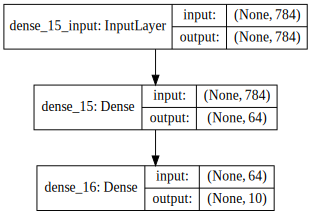

In [23]:
# step 3. 모델아키텍처의 시각화
# 그래프출력이 않될경우 주석 해제후 실행
# import os
# graphviz의 경로설정(환경변수에 등록)
# os.environ["PATH"] += os.pathsep + 'c:/Program Files (x86)/Graphviz2.38/bin'
# 또는 재설치후 다시시작!
# conda install -c anaconda graphviz
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [24]:
# step 4. 모델학습
hist = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

Train on 47400 samples, validate on 12600 samples
Epoch 1/10
47400/47400 [==============================] - 2s 40us/step - loss: 0.7419 - accuracy: 0.8143 - val_loss: 0.4047 - val_accuracy: 0.8893
Epoch 2/10
47400/47400 [==============================] - 2s 32us/step - loss: 0.3695 - accuracy: 0.8972 - val_loss: 0.3299 - val_accuracy: 0.9097
Epoch 3/10
47400/47400 [==============================] - 2s 33us/step - loss: 0.3187 - accuracy: 0.9104 - val_loss: 0.2991 - val_accuracy: 0.9170
Epoch 4/10
47400/47400 [==============================] - 1s 31us/step - loss: 0.2896 - accuracy: 0.9182 - val_loss: 0.2728 - val_accuracy: 0.9239
Epoch 5/10
47400/47400 [==============================] - 2s 32us/step - loss: 0.2678 - accuracy: 0.9247 - val_loss: 0.2561 - val_accuracy: 0.9263
Epoch 6/10
47400/47400 [==============================] - 2s 32us/step - loss: 0.2497 - accuracy: 0.9297 - val_loss: 0.2421 - val_accuracy: 0.9312
Epoch 7/10
47400/47400 [==============================] - 1s 32us/st

In [25]:
# setp 5. 모델평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics :', str(loss_and_metrics))

10000/10000 [==============================] - 0s 13us/step
loss_and_metrics : [0.19116360082030295, 0.9465000033378601]


In [26]:
# step 6. 모델사용
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat_idx
xhat = x_test[xhat_idx]
xhat
yhat = model.predict_classes(xhat)

for i in range(5):
    print('실제이미지=' + str(argmax(y_test[xhat_idx[i]])) + ', 예측이미지=' + str(yhat[i])) 

실제이미지=3, 예측이미지=3
실제이미지=6, 예측이미지=6
실제이미지=0, 예측이미지=0
실제이미지=1, 예측이미지=1
실제이미지=4, 예측이미지=4


In [27]:
# step 7. 모델저장
model.save('../data/deeplearning/mnist_mlp_model.h5')

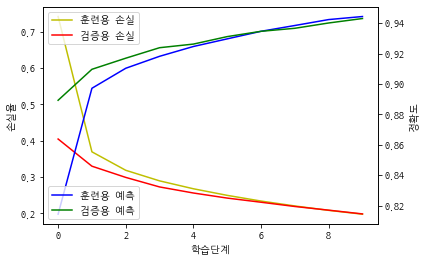

In [28]:
# setp 8. 모델학습결과 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='훈련용 손실')
loss_ax.plot(hist.history['val_loss'], 'r', label='검증용 손실')
acc_ax.plot(hist.history['accuracy'], 'b', label='훈련용 예측')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='검증용 예측')

loss_ax.set_xlabel("학습단계")
loss_ax.set_ylabel("손실율")
acc_ax.set_ylabel("정확도")

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [29]:
# step 9. 저장된 모델 불러오기
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 50)
xhat = x_test[xhat_idx]

# 모델불러오기
model = load_model('../data/deeplearning/mnist_mlp_model.h5')

# 모델사용해서 예측
yhat = model.predict_classes(xhat)
yhat
for i in range(50):
    print('실제이미지=' + str(argmax(y_test[xhat_idx[i]])) + ', 예측이미지=' + str(yhat[i])) 

실제이미지=9, 예측이미지=9
실제이미지=8, 예측이미지=8
실제이미지=4, 예측이미지=4
실제이미지=3, 예측이미지=3
실제이미지=9, 예측이미지=9
실제이미지=9, 예측이미지=9
실제이미지=8, 예측이미지=8
실제이미지=0, 예측이미지=0
실제이미지=5, 예측이미지=5
실제이미지=2, 예측이미지=2
실제이미지=2, 예측이미지=2
실제이미지=9, 예측이미지=9
실제이미지=6, 예측이미지=6
실제이미지=0, 예측이미지=0
실제이미지=8, 예측이미지=8
실제이미지=2, 예측이미지=2
실제이미지=1, 예측이미지=1
실제이미지=3, 예측이미지=3
실제이미지=9, 예측이미지=9
실제이미지=0, 예측이미지=0
실제이미지=0, 예측이미지=0
실제이미지=2, 예측이미지=2
실제이미지=4, 예측이미지=4
실제이미지=1, 예측이미지=1
실제이미지=4, 예측이미지=4
실제이미지=1, 예측이미지=1
실제이미지=1, 예측이미지=1
실제이미지=3, 예측이미지=3
실제이미지=1, 예측이미지=1
실제이미지=3, 예측이미지=3
실제이미지=7, 예측이미지=7
실제이미지=8, 예측이미지=8
실제이미지=3, 예측이미지=3
실제이미지=1, 예측이미지=1
실제이미지=7, 예측이미지=7
실제이미지=8, 예측이미지=5
실제이미지=6, 예측이미지=6
실제이미지=3, 예측이미지=3
실제이미지=7, 예측이미지=7
실제이미지=3, 예측이미지=3
실제이미지=7, 예측이미지=3
실제이미지=1, 예측이미지=8
실제이미지=9, 예측이미지=9
실제이미지=2, 예측이미지=2
실제이미지=0, 예측이미지=0
실제이미지=3, 예측이미지=3
실제이미지=4, 예측이미지=4
실제이미지=1, 예측이미지=1
실제이미지=7, 예측이미지=7
실제이미지=7, 예측이미지=7


###### 3. 피마인디언 당뇨병
* 다운로드 : https://www.kaggle.com/kumargh/pimaindiansdiabetescsv/version/1
* pima-indians-diabetes.csv
  - 768행 8속성, 2개의 클래스(0과 1)
  - Pregnancies : 임신횟수
  - Glucose : 포도당 부하 검사 수치(경구포도당내성검사에서 2시간후 혈당(포도당농도_
  - BloodPressure : 혈압(이완기)
  - SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(삼두근피부두께)
  - Insulin : 혈청 인슐린(2시간)
  - BMI : 체질량 지수
  - DiabetesPedigreeFunction : 당뇨 내력 가중치 값(당뇨직계가족력)
  - Age : 나이
  - Outcome : 당뇨여부(0 또는 1)
* 양성 268(34.9%), 음성 500(65.1%)

In [30]:
# step 1. 데이터로드
np.random.seed(5) # 랜덤시드고정
data = np.loadtxt('../data/deeplearning/pima-indians-diabetes.csv', delimiter=",", skiprows=6)
data.shape

# step 2. 데이터분할 75:25
x_train = data[:576, 0:8]
y_train = data[:576, 8]
x_test = data[576:, 0:8]
y_test = data[576:, 8]

# step 3. 모델구성
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층

# setp 4. 모델학습설정
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# setp 5. 모델학습
hist = model.fit(x_train, y_train, epochs=1500, batch_size=64)

Epoch 1/1500
576/576 [==============================] - 0s 365us/step - loss: 4.4317 - accuracy: 0.6562
Epoch 2/1500
576/576 [==============================] - 0s 16us/step - loss: 3.7658 - accuracy: 0.6319
Epoch 3/1500
576/576 [==============================] - 0s 17us/step - loss: 3.5339 - accuracy: 0.6128
Epoch 4/1500
576/576 [==============================] - 0s 16us/step - loss: 3.3522 - accuracy: 0.6111
Epoch 5/1500
576/576 [==============================] - 0s 14us/step - loss: 3.0199 - accuracy: 0.6354
Epoch 6/1500
576/576 [==============================] - 0s 16us/step - loss: 2.6686 - accuracy: 0.6493
Epoch 7/1500
576/576 [==============================] - 0s 14us/step - loss: 2.2960 - accuracy: 0.6597
Epoch 8/1500
576/576 [==============================] - 0s 19us/step - loss: 1.8866 - accuracy: 0.6580
Epoch 9/1500
576/576 [==============================] - 0s 14us/step - loss: 1.5457 - accuracy: 0.5816
Epoch 10/1500
576/576 [==============================] - 0s 17us/step - 

576/576 [==============================] - 0s 35us/step - loss: 0.5600 - accuracy: 0.7240
Epoch 80/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5608 - accuracy: 0.7205
Epoch 81/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5573 - accuracy: 0.7222
Epoch 82/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5623 - accuracy: 0.7083
Epoch 83/1500
576/576 [==============================] - 0s 21us/step - loss: 0.5659 - accuracy: 0.7066
Epoch 84/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5602 - accuracy: 0.6997
Epoch 85/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5576 - accuracy: 0.7153
Epoch 86/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5541 - accuracy: 0.7101
Epoch 87/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5538 - accuracy: 0.7101
Epoch 88/1500
576/576 [==============================] - 0s 16us/step - loss: 

576/576 [==============================] - 0s 19us/step - loss: 0.5328 - accuracy: 0.7274
Epoch 158/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5285 - accuracy: 0.7153
Epoch 159/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5291 - accuracy: 0.7292
Epoch 160/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5297 - accuracy: 0.7240
Epoch 161/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5351 - accuracy: 0.7188
Epoch 162/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5356 - accuracy: 0.7170
Epoch 163/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5438 - accuracy: 0.7153
Epoch 164/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5300 - accuracy: 0.7205
Epoch 165/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5291 - accuracy: 0.7188
Epoch 166/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.5245 - accuracy: 0.7188
Epoch 235/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5163 - accuracy: 0.7326
Epoch 236/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5136 - accuracy: 0.7378
Epoch 237/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5137 - accuracy: 0.7292
Epoch 238/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5118 - accuracy: 0.7326
Epoch 239/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5113 - accuracy: 0.7396
Epoch 240/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5113 - accuracy: 0.7326
Epoch 241/1500
576/576 [==============================] - 0s 17us/step - loss: 0.5131 - accuracy: 0.7378
Epoch 242/1500
576/576 [==============================] - ETA: 0s - loss: 0.5040 - accuracy: 0.73 - 0s 19us/step - loss: 0.5119 - accuracy: 0.7344
Epoch 243/1500
576/576 [====

576/576 [==============================] - 0s 16us/step - loss: 0.5033 - accuracy: 0.7413
Epoch 312/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5110 - accuracy: 0.7222
Epoch 313/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4991 - accuracy: 0.7500
Epoch 314/1500
576/576 [==============================] - 0s 14us/step - loss: 0.5051 - accuracy: 0.7465
Epoch 315/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5031 - accuracy: 0.7326
Epoch 316/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4987 - accuracy: 0.7361
Epoch 317/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4990 - accuracy: 0.7431
Epoch 318/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5017 - accuracy: 0.7378
Epoch 319/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4975 - accuracy: 0.7465
Epoch 320/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4918 - accuracy: 0.7465
Epoch 390/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4884 - accuracy: 0.7465
Epoch 391/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4870 - accuracy: 0.7431
Epoch 392/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4918 - accuracy: 0.7483
Epoch 393/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4921 - accuracy: 0.7413
Epoch 394/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4968 - accuracy: 0.7448
Epoch 395/1500
576/576 [==============================] - 0s 16us/step - loss: 0.5032 - accuracy: 0.7361
Epoch 396/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4986 - accuracy: 0.7396
Epoch 397/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4944 - accuracy: 0.7361
Epoch 398/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4804 - accuracy: 0.7517
Epoch 468/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4812 - accuracy: 0.7604
Epoch 469/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4825 - accuracy: 0.7622
Epoch 470/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4824 - accuracy: 0.7552
Epoch 471/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4848 - accuracy: 0.7622
Epoch 472/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4842 - accuracy: 0.7552
Epoch 473/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4859 - accuracy: 0.7517
Epoch 474/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4885 - accuracy: 0.7517
Epoch 475/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4842 - accuracy: 0.7517
Epoch 476/1500
576/576 [==============================] - 0s 17us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4698 - accuracy: 0.7587
Epoch 546/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4731 - accuracy: 0.7569
Epoch 547/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4721 - accuracy: 0.7743
Epoch 548/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4693 - accuracy: 0.7587
Epoch 549/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4683 - accuracy: 0.7674
Epoch 550/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4700 - accuracy: 0.7639
Epoch 551/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4707 - accuracy: 0.7726
Epoch 552/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4733 - accuracy: 0.7622
Epoch 553/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4810 - accuracy: 0.7604
Epoch 554/1500
576/576 [==============================] - ETA: 0s - lo

576/576 [==============================] - 0s 16us/step - loss: 0.4622 - accuracy: 0.7604
Epoch 623/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4628 - accuracy: 0.7674
Epoch 624/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4636 - accuracy: 0.7726
Epoch 625/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4689 - accuracy: 0.7726
Epoch 626/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4706 - accuracy: 0.7691
Epoch 627/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4686 - accuracy: 0.7604
Epoch 628/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4727 - accuracy: 0.7760
Epoch 629/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4745 - accuracy: 0.7674
Epoch 630/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4679 - accuracy: 0.7674
Epoch 631/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 14us/step - loss: 0.4579 - accuracy: 0.7674
Epoch 700/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4596 - accuracy: 0.7674
Epoch 701/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4616 - accuracy: 0.7708
Epoch 702/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4613 - accuracy: 0.7743
Epoch 703/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4607 - accuracy: 0.7726
Epoch 704/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4582 - accuracy: 0.7639
Epoch 705/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4596 - accuracy: 0.7760
Epoch 706/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4606 - accuracy: 0.7674
Epoch 707/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4614 - accuracy: 0.7691
Epoch 708/1500
576/576 [==============================] - 0s 14us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4505 - accuracy: 0.7743
Epoch 777/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4539 - accuracy: 0.7656
Epoch 778/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4550 - accuracy: 0.7882
Epoch 779/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4557 - accuracy: 0.7708
Epoch 780/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4533 - accuracy: 0.7708
Epoch 781/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4525 - accuracy: 0.7691
Epoch 782/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4613 - accuracy: 0.7778
Epoch 783/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4592 - accuracy: 0.7674
Epoch 784/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4548 - accuracy: 0.7691
Epoch 785/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4462 - accuracy: 0.7726
Epoch 855/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4464 - accuracy: 0.7726
Epoch 856/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4474 - accuracy: 0.7656
Epoch 857/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4457 - accuracy: 0.7743
Epoch 858/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4443 - accuracy: 0.7778
Epoch 859/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4457 - accuracy: 0.7743
Epoch 860/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4449 - accuracy: 0.7743
Epoch 861/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4449 - accuracy: 0.7778
Epoch 862/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4485 - accuracy: 0.7656
Epoch 863/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 17us/step - loss: 0.4434 - accuracy: 0.7760
Epoch 933/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4383 - accuracy: 0.7778
Epoch 934/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4446 - accuracy: 0.7726
Epoch 935/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4381 - accuracy: 0.7760
Epoch 936/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4374 - accuracy: 0.7743
Epoch 937/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4384 - accuracy: 0.7778
Epoch 938/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4388 - accuracy: 0.7795
Epoch 939/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4393 - accuracy: 0.7795
Epoch 940/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4449 - accuracy: 0.7812
Epoch 941/1500
576/576 [==============================] - 0s 16us/step

576/576 [==============================] - 0s 16us/step - loss: 0.4445 - accuracy: 0.7743
Epoch 1010/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4364 - accuracy: 0.7674
Epoch 1011/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4325 - accuracy: 0.7743
Epoch 1012/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4339 - accuracy: 0.7743
Epoch 1013/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4348 - accuracy: 0.7760
Epoch 1014/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4322 - accuracy: 0.7760
Epoch 1015/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4355 - accuracy: 0.7795
Epoch 1016/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4340 - accuracy: 0.7812
Epoch 1017/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4329 - accuracy: 0.7726
Epoch 1018/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4298 - accuracy: 0.7882
Epoch 1087/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4282 - accuracy: 0.7778
Epoch 1088/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4286 - accuracy: 0.7795
Epoch 1089/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4331 - accuracy: 0.7882
Epoch 1090/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4296 - accuracy: 0.7865
Epoch 1091/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4302 - accuracy: 0.7951
Epoch 1092/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4294 - accuracy: 0.7917
Epoch 1093/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4277 - accuracy: 0.7830
Epoch 1094/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4287 - accuracy: 0.7795
Epoch 1095/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4359 - accuracy: 0.7830
Epoch 1164/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4335 - accuracy: 0.7865
Epoch 1165/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4319 - accuracy: 0.7847
Epoch 1166/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4305 - accuracy: 0.7882
Epoch 1167/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4408 - accuracy: 0.7726
Epoch 1168/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4301 - accuracy: 0.7830
Epoch 1169/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4247 - accuracy: 0.7812
Epoch 1170/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4258 - accuracy: 0.7812
Epoch 1171/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4235 - accuracy: 0.7812
Epoch 1172/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 16us/step - loss: 0.4186 - accuracy: 0.7882
Epoch 1241/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4212 - accuracy: 0.7847
Epoch 1242/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4163 - accuracy: 0.7847
Epoch 1243/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4232 - accuracy: 0.7847
Epoch 1244/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4272 - accuracy: 0.7830
Epoch 1245/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4278 - accuracy: 0.7795
Epoch 1246/1500
576/576 [==============================] - 0s 14us/step - loss: 0.4282 - accuracy: 0.7934
Epoch 1247/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4160 - accuracy: 0.7882
Epoch 1248/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4222 - accuracy: 0.7865
Epoch 1249/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 14us/step - loss: 0.4175 - accuracy: 0.7830
Epoch 1318/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4155 - accuracy: 0.7951
Epoch 1319/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4170 - accuracy: 0.7951
Epoch 1320/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4161 - accuracy: 0.7830
Epoch 1321/1500
576/576 [==============================] - 0s 35us/step - loss: 0.4136 - accuracy: 0.7865
Epoch 1322/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4196 - accuracy: 0.7969
Epoch 1323/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4179 - accuracy: 0.7951
Epoch 1324/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4131 - accuracy: 0.7934
Epoch 1325/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4151 - accuracy: 0.7812
Epoch 1326/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 17us/step - loss: 0.4138 - accuracy: 0.7847
Epoch 1395/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4130 - accuracy: 0.7865
Epoch 1396/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4129 - accuracy: 0.7778
Epoch 1397/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4170 - accuracy: 0.7899
Epoch 1398/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4170 - accuracy: 0.7795
Epoch 1399/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4197 - accuracy: 0.7812
Epoch 1400/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4253 - accuracy: 0.7882
Epoch 1401/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4137 - accuracy: 0.7986
Epoch 1402/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4125 - accuracy: 0.7812
Epoch 1403/1500
576/576 [==============================] - 0s 

576/576 [==============================] - 0s 19us/step - loss: 0.4178 - accuracy: 0.7812
Epoch 1472/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4113 - accuracy: 0.7812
Epoch 1473/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4075 - accuracy: 0.7847
Epoch 1474/1500
576/576 [==============================] - 0s 19us/step - loss: 0.4062 - accuracy: 0.7847
Epoch 1475/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4058 - accuracy: 0.7882
Epoch 1476/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4067 - accuracy: 0.7847
Epoch 1477/1500
576/576 [==============================] - 0s 16us/step - loss: 0.4075 - accuracy: 0.7830
Epoch 1478/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4093 - accuracy: 0.7812
Epoch 1479/1500
576/576 [==============================] - 0s 17us/step - loss: 0.4073 - accuracy: 0.7917
Epoch 1480/1500
576/576 [==============================] - 0s 

In [31]:
# step 6. 모델평가
scores = model.evaluate(x_test, y_test)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 390us/step
accuracy: 76.04%


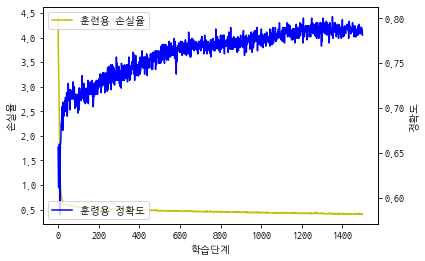

In [32]:
# step 7. 모델학습과정의 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='훈련용 손실율')
acc_ax.plot(hist.history['accuracy'], 'b', label='훈령용 정확도')

loss_ax.set_xlabel("학습단계")
loss_ax.set_ylabel("손실율")
acc_ax.set_ylabel("정확도")

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

###### 4. iris 품종예측

In [33]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [34]:
iris = sns.load_dataset('iris')

# One-HotEncoding
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values
# LabelEncoder()함수 : 문자를 숫자(수치화), 숫자를 문자로 매핑하는 함수
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values

# 데이타셋 분할
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [35]:
# 모델생성
model = Sequential()
model.add(Dense(64, input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile('adam', 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                320       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [36]:
# 모델학습
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 2ms/step - loss: 1.5482 - accuracy: 0.3250 - val_loss: 1.0930 - val_accuracy: 0.3667
Epoch 2/100
120/120 [==============================] - 0s 50us/step - loss: 1.0186 - accuracy: 0.3583 - val_loss: 1.0552 - val_accuracy: 0.2000
Epoch 3/100
120/120 [==============================] - 0s 50us/step - loss: 0.9374 - accuracy: 0.3667 - val_loss: 1.0646 - val_accuracy: 0.2000
Epoch 4/100
120/120 [==============================] - 0s 58us/step - loss: 0.9217 - accuracy: 0.3667 - val_loss: 1.0144 - val_accuracy: 0.2000
Epoch 5/100
120/120 [==============================] - 0s 50us/step - loss: 0.8661 - accuracy: 0.3750 - val_loss: 0.9091 - val_accuracy: 0.2333
Epoch 6/100
120/120 [==============================] - 0s 50us/step - loss: 0.7907 - accuracy: 0.4667 - val_loss: 0.8344 - val_accuracy: 0.6000
Epoch 7/100
120/120 [==============================] - 0s 66us/step - loss: 0.7309 - accurac

120/120 [==============================] - 0s 42us/step - loss: 0.1231 - accuracy: 0.9750 - val_loss: 0.1560 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 42us/step - loss: 0.1196 - accuracy: 0.9750 - val_loss: 0.1600 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 42us/step - loss: 0.1180 - accuracy: 0.9750 - val_loss: 0.1514 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 58us/step - loss: 0.1163 - accuracy: 0.9750 - val_loss: 0.1466 - val_accuracy: 1.0000
Epoch 61/100
120/120 [==============================] - 0s 50us/step - loss: 0.1140 - accuracy: 0.9750 - val_loss: 0.1439 - val_accuracy: 1.0000
Epoch 62/100
120/120 [==============================] - 0s 58us/step - loss: 0.1123 - accuracy: 0.9750 - val_loss: 0.1506 - val_accuracy: 0.9667
Epoch 63/100
120/120 [==============================] - 0s 50us/step - loss: 0.1094 - accuracy: 0.9750 - val_loss: 0.1380 - val_accuracy: 1.000

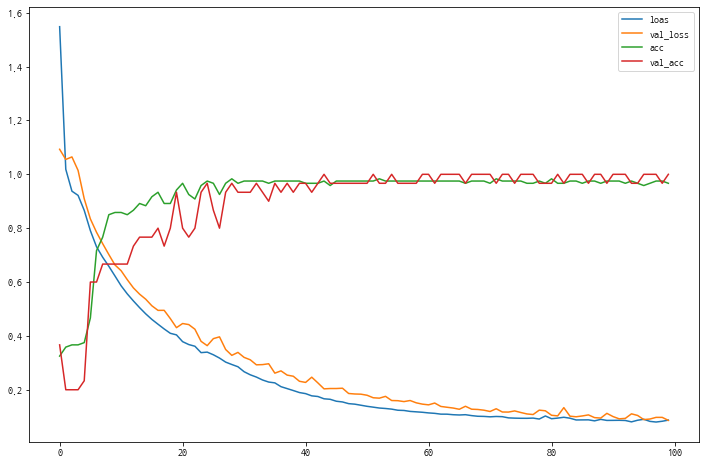

In [37]:
# 시각화
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 학습용 데이더셋의 손실률
plt.plot(hist.history['val_loss']) # 검증용 데이더셋의 손실률
plt.plot(hist.history['accuracy']) # 학습용 데이더셋의 정확동
plt.plot(hist.history['val_accuracy']) # 학습용 데이더셋의 정확동

plt.legend(['loas', 'val_loss', 'acc', 'val_acc'])

plt.show()

In [38]:
# 모델평가
loss, accuracy = model.evaluate(X_test, y_test)
print('정확도={:.2f}'.format(accuracy))

30/30 [==============================] - 0s 0us/step
정확도=1.00


In [39]:
# 모델예측 : 오분류보고서
y_pred = model.predict(X_test)
y_pred
y_test_class = np.argmax(y_test, axis=1)
print(y_test_class)
y_pred_class = np.argmax(y_pred, axis=1)
print(y_pred_class)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In [40]:
# 새로운 값을 예측
test_set = np.array([[5,2.9,1,0.2]])
print('품종예측 {}'.format(iris['species'].unique()[model.predict_classes(test_set)]))

test_set = np.array([[7,3.0,5,1.4]])
print('품종예측 {}'.format(iris['species'].unique()[model.predict_classes(test_set)]))

품종예측 ['setosa']
품종예측 ['versicolor']


###### 5. Titanic 생존율예측

* 다운로드 : http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

In [41]:
np.random.seed(7)
data = pd.read_excel('../data/deeplearning/titanic3.xls')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [42]:
data.describe
data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


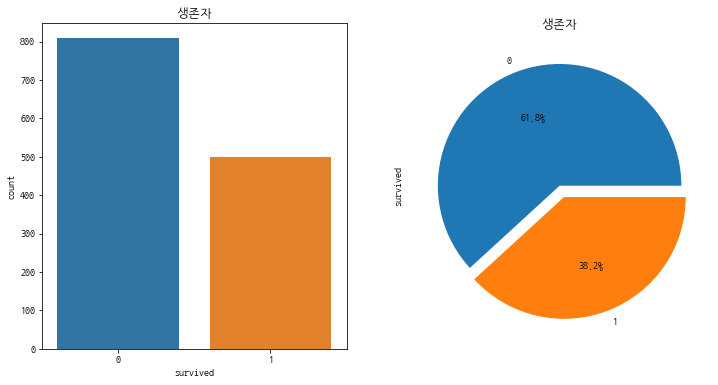

In [43]:
f, ax = plt.subplots(1,2,figsize=(12,6))
data['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%')
ax[0].set_title('생존자')
ax[0].set_ylabel('')

sns.countplot('survived', data=data, ax=ax[0])
ax[1].set_title('생존자')

plt.show()

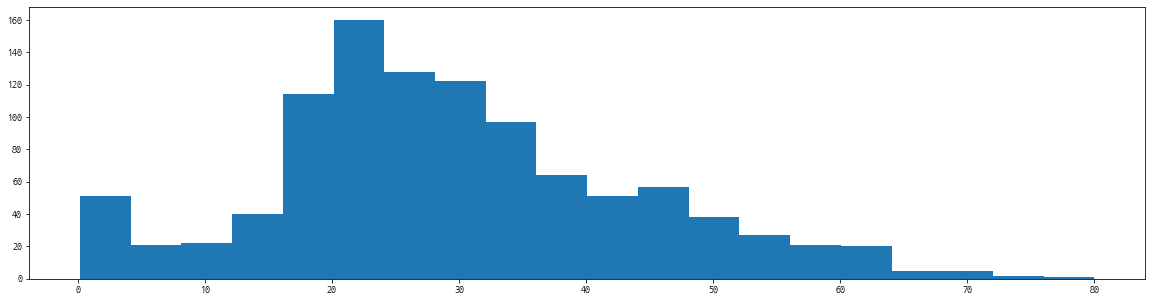

In [44]:
# 년령별분로 분포(갓난이들도 많음 알 수 있음)
data['age'].hist(bins=20, figsize=(20,5), grid=False)
plt.show()

In [45]:
# 객실등급통계
data.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


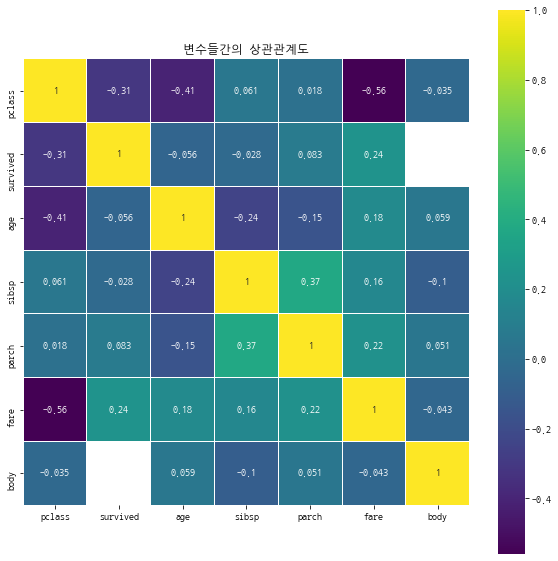

In [46]:
# 상관관계분석
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), linewidths=0.01, square=True, annot=True, cmap=plt.cm.viridis, linecolor='white')
plt.title('변수들간의 상관관계도')
plt.show()

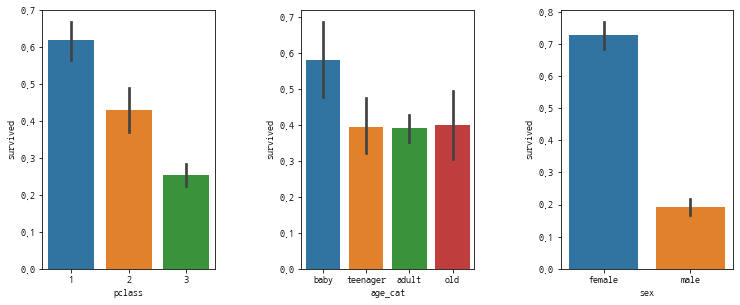

In [47]:
# 연령대를 나누어서 분석
data['age_cat'] = pd.cut(data['age'], bins=[0,10,20,50,100], include_lowest=True, 
                         labels=['baby', 'teenager', 'adult', 'old'])
data.head()

plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=data)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=data)
plt.subplot(133)
sns.barplot('sex', 'survived', data=data)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, hspace=0.5, wspace=0.5)
plt.show()

# 결과분석
# 1등석, 아기, 여성일 경우 생존률이 높음

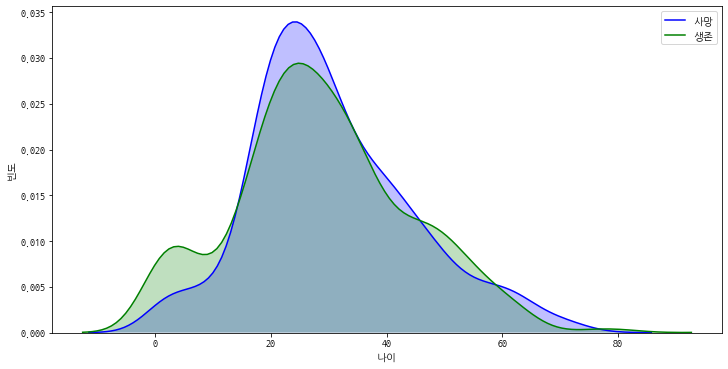

In [48]:
# 나이분포곡선
f, ax = plt.subplots(figsize=(12,6))
g = sns.kdeplot(data['age'][(data['survived']==0) & (data['age'].notnull())], ax=ax, color='Blue', shade=True)
g = sns.kdeplot(data['age'][(data['survived']==1) & (data['age'].notnull())], ax=g, color='Green', shade=True)
g.set_xlabel('나이')
g.set_ylabel('빈도')
g = g.legend(['사망', '생존'])
plt.show()

In [49]:
import seaborn as sns

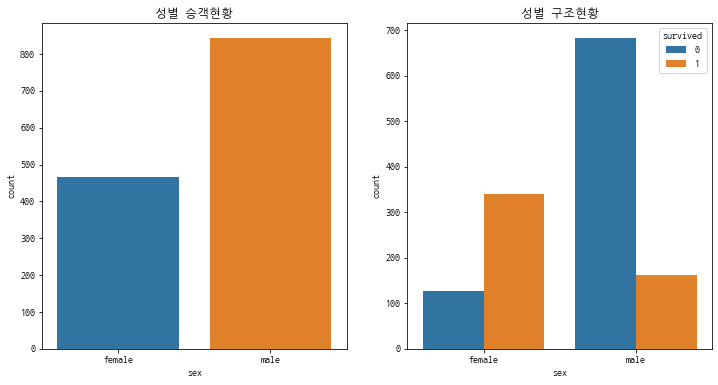

In [50]:
# 성별분석
f, ax = plt.subplots(1,2,figsize=[12,6])
sns.countplot('sex', data=data, ax=ax[0])
ax[0].set_title('성별 승객현황')
sns.countplot('sex', hue='survived', data=data, ax=ax[1])
ax[1].set_title('성별 구조현황')
plt.show()

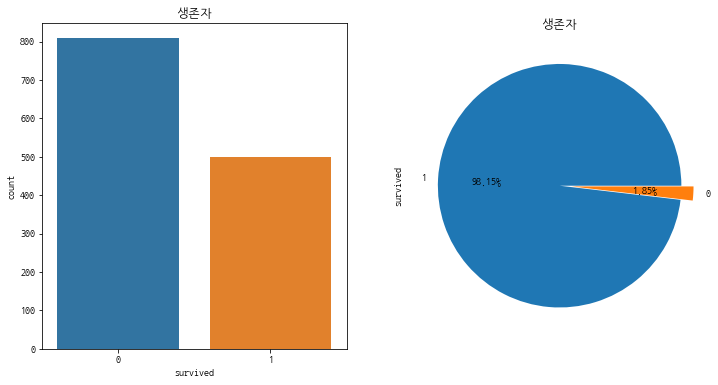

In [51]:
# 구조보트에 탑승한 사람
boat_survivors = data[data['boat'].notnull()]
f, ax = plt.subplots(1,2,figsize=[12,6])
boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
ax[0].set_title('생존자')
ax[0].set_ylabel('')
sns.countplot('survived', data=data, ax=ax[0])
ax[1].set_title('생존자')
plt.show()

###### 타이타닉 생존율 예측 실습

In [52]:
# setp 1. 데이터전처리
# 1) 성별 fmale -> 1, male -> 0으로 변환
tmp =[]
for gender in data['sex']:
    if gender == 'female':
        tmp.append(1)
    elif gender == 'male':
        tmp.append(0)
    else:
        tmp.append(np.nan)
data['sex'] = tmp 

In [53]:
# 2) 숫자형일치
# data.info()
data['survived'] = data['survived'].astype('float')
data['pclass'] = data['pclass'].astype('float')
data['sex'] = data['sex'].astype('float')
data['sibsp'] = data['sibsp'].astype('float')
data['parch'] = data['parch'].astype('float')
data['fare'] = data['fare'].astype('float')
data.info()

# 3) 결측치제거
data = data[data['age'].notnull()]
data = data[data['sibsp'].notnull()]
data = data[data['parch'].notnull()]
data = data[data['fare'].notnull()]
data.shape
# 1309 -> 1405건으로 감소

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 144.8+ KB


(1045, 15)

In [54]:
# step 2. 실습용데이터셋준비
from sklearn.model_selection import train_test_split
# 1) 예측할 변수선정
x_data = data.values[:, [0,3,4,5,6,8]]
y_data = data.values[:, [1]]
X_train, X_test, y_train, y_test =\
    train_test_split(x_data, y_data, test_size=0.2, random_state=7)

In [55]:
# step 3. 모델생성
model = Sequential()
model.add(Dense(255, input_shape=(6,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 255)               1785      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 256       
Total params: 2,041
Trainable params: 2,041
Non-trainable params: 0
_________________________________________________________________


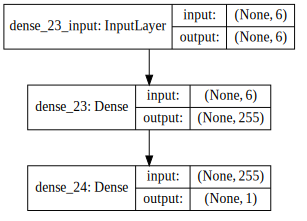

In [56]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [57]:
# step 4. 모델학습
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Train on 836 samples, validate on 209 samples
Epoch 1/500
836/836 [==============================] - 0s 243us/step - loss: 0.2791 - accuracy: 0.5945 - val_loss: 0.2155 - val_accuracy: 0.6555
Epoch 2/500
836/836 [==============================] - 0s 29us/step - loss: 0.2274 - accuracy: 0.6711 - val_loss: 0.2163 - val_accuracy: 0.7129
Epoch 3/500
836/836 [==============================] - 0s 30us/step - loss: 0.2224 - accuracy: 0.6722 - val_loss: 0.1999 - val_accuracy: 0.7129
Epoch 4/500
836/836 [==============================] - 0s 30us/step - loss: 0.1967 - accuracy: 0.7225 - val_loss: 0.2003 - val_accuracy: 0.7608
Epoch 5/500
836/836 [==============================] - 0s 31us/step - loss: 0.1922 - accuracy: 0.7141 - val_loss: 0.1807 - val_accuracy: 0.7560
Epoch 6/500
836/836 [==============================] - 0s 30us/step - loss: 0.1841 - accuracy: 0.7500 - val_loss: 0.1688 - val_accuracy: 0.7990
Epoch 7/500
836/836 [==============================] - 0s 31us/step - loss: 0.1810 - accu

836/836 [==============================] - 0s 29us/step - loss: 0.1479 - accuracy: 0.7931 - val_loss: 0.1370 - val_accuracy: 0.8086
Epoch 58/500
836/836 [==============================] - 0s 30us/step - loss: 0.1511 - accuracy: 0.7859 - val_loss: 0.1414 - val_accuracy: 0.7895
Epoch 59/500
836/836 [==============================] - 0s 30us/step - loss: 0.1497 - accuracy: 0.7943 - val_loss: 0.1397 - val_accuracy: 0.8038
Epoch 60/500
836/836 [==============================] - 0s 30us/step - loss: 0.1510 - accuracy: 0.7919 - val_loss: 0.1391 - val_accuracy: 0.8038
Epoch 61/500
836/836 [==============================] - 0s 30us/step - loss: 0.1531 - accuracy: 0.7907 - val_loss: 0.1357 - val_accuracy: 0.8134
Epoch 62/500
836/836 [==============================] - 0s 36us/step - loss: 0.1510 - accuracy: 0.7943 - val_loss: 0.1415 - val_accuracy: 0.7895
Epoch 63/500
836/836 [==============================] - 0s 33us/step - loss: 0.1502 - accuracy: 0.7871 - val_loss: 0.1350 - val_accuracy: 0.813

836/836 [==============================] - 0s 27us/step - loss: 0.1480 - accuracy: 0.7978 - val_loss: 0.1379 - val_accuracy: 0.8086
Epoch 114/500
836/836 [==============================] - 0s 27us/step - loss: 0.1463 - accuracy: 0.7931 - val_loss: 0.1455 - val_accuracy: 0.7943
Epoch 115/500
836/836 [==============================] - 0s 27us/step - loss: 0.1461 - accuracy: 0.8074 - val_loss: 0.1352 - val_accuracy: 0.8182
Epoch 116/500
836/836 [==============================] - 0s 27us/step - loss: 0.1411 - accuracy: 0.8122 - val_loss: 0.1346 - val_accuracy: 0.8278
Epoch 117/500
836/836 [==============================] - 0s 27us/step - loss: 0.1400 - accuracy: 0.8146 - val_loss: 0.1466 - val_accuracy: 0.8038
Epoch 118/500
836/836 [==============================] - 0s 31us/step - loss: 0.1436 - accuracy: 0.7990 - val_loss: 0.1351 - val_accuracy: 0.8086
Epoch 119/500
836/836 [==============================] - 0s 27us/step - loss: 0.1388 - accuracy: 0.8050 - val_loss: 0.1343 - val_accuracy:

836/836 [==============================] - 0s 44us/step - loss: 0.1386 - accuracy: 0.8038 - val_loss: 0.1404 - val_accuracy: 0.8325
Epoch 170/500
836/836 [==============================] - 0s 41us/step - loss: 0.1525 - accuracy: 0.7967 - val_loss: 0.1322 - val_accuracy: 0.8230
Epoch 171/500
836/836 [==============================] - 0s 51us/step - loss: 0.1472 - accuracy: 0.7967 - val_loss: 0.1455 - val_accuracy: 0.8038
Epoch 172/500
836/836 [==============================] - 0s 56us/step - loss: 0.1556 - accuracy: 0.7943 - val_loss: 0.1366 - val_accuracy: 0.8325
Epoch 173/500
836/836 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.84 - 0s 51us/step - loss: 0.1469 - accuracy: 0.8038 - val_loss: 0.1414 - val_accuracy: 0.7943
Epoch 174/500
836/836 [==============================] - 0s 50us/step - loss: 0.1433 - accuracy: 0.8014 - val_loss: 0.1332 - val_accuracy: 0.8230
Epoch 175/500
836/836 [==============================] - 0s 49us/step - loss: 0.1349 - accuracy:

Epoch 225/500
836/836 [==============================] - 0s 26us/step - loss: 0.1347 - accuracy: 0.8146 - val_loss: 0.1505 - val_accuracy: 0.7608
Epoch 226/500
836/836 [==============================] - 0s 26us/step - loss: 0.1346 - accuracy: 0.8122 - val_loss: 0.1342 - val_accuracy: 0.8134
Epoch 227/500
836/836 [==============================] - 0s 26us/step - loss: 0.1323 - accuracy: 0.8122 - val_loss: 0.1505 - val_accuracy: 0.8086
Epoch 228/500
836/836 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.93 - 0s 26us/step - loss: 0.1338 - accuracy: 0.8206 - val_loss: 0.1336 - val_accuracy: 0.8182
Epoch 229/500
836/836 [==============================] - 0s 26us/step - loss: 0.1382 - accuracy: 0.8146 - val_loss: 0.1369 - val_accuracy: 0.8325
Epoch 230/500
836/836 [==============================] - 0s 25us/step - loss: 0.1325 - accuracy: 0.8086 - val_loss: 0.1388 - val_accuracy: 0.8086
Epoch 231/500
836/836 [==============================] - 0s 25us/step - loss: 0.13

Epoch 281/500
836/836 [==============================] - 0s 27us/step - loss: 0.1310 - accuracy: 0.8218 - val_loss: 0.1419 - val_accuracy: 0.8278
Epoch 282/500
836/836 [==============================] - 0s 26us/step - loss: 0.1324 - accuracy: 0.8170 - val_loss: 0.1391 - val_accuracy: 0.8134
Epoch 283/500
836/836 [==============================] - 0s 26us/step - loss: 0.1387 - accuracy: 0.8122 - val_loss: 0.1477 - val_accuracy: 0.7895
Epoch 284/500
836/836 [==============================] - 0s 26us/step - loss: 0.1330 - accuracy: 0.8146 - val_loss: 0.1363 - val_accuracy: 0.8325
Epoch 285/500
836/836 [==============================] - 0s 26us/step - loss: 0.1296 - accuracy: 0.8230 - val_loss: 0.1413 - val_accuracy: 0.7847
Epoch 286/500
836/836 [==============================] - 0s 27us/step - loss: 0.1325 - accuracy: 0.8278 - val_loss: 0.1409 - val_accuracy: 0.8182
Epoch 287/500
836/836 [==============================] - 0s 27us/step - loss: 0.1284 - accuracy: 0.8146 - val_loss: 0.1500 -

836/836 [==============================] - 0s 27us/step - loss: 0.1324 - accuracy: 0.8122 - val_loss: 0.1433 - val_accuracy: 0.8230
Epoch 338/500
836/836 [==============================] - 0s 26us/step - loss: 0.1282 - accuracy: 0.8194 - val_loss: 0.1424 - val_accuracy: 0.8038
Epoch 339/500
836/836 [==============================] - 0s 25us/step - loss: 0.1247 - accuracy: 0.8278 - val_loss: 0.1383 - val_accuracy: 0.8230
Epoch 340/500
836/836 [==============================] - 0s 25us/step - loss: 0.1276 - accuracy: 0.8301 - val_loss: 0.1377 - val_accuracy: 0.8182
Epoch 341/500
836/836 [==============================] - 0s 25us/step - loss: 0.1244 - accuracy: 0.8266 - val_loss: 0.1498 - val_accuracy: 0.8086
Epoch 342/500
836/836 [==============================] - 0s 26us/step - loss: 0.1316 - accuracy: 0.8182 - val_loss: 0.1602 - val_accuracy: 0.7608
Epoch 343/500
836/836 [==============================] - 0s 25us/step - loss: 0.1358 - accuracy: 0.8206 - val_loss: 0.1495 - val_accuracy:

836/836 [==============================] - 0s 29us/step - loss: 0.1281 - accuracy: 0.8170 - val_loss: 0.1403 - val_accuracy: 0.8278
Epoch 394/500
836/836 [==============================] - 0s 29us/step - loss: 0.1271 - accuracy: 0.8337 - val_loss: 0.1583 - val_accuracy: 0.8134
Epoch 395/500
836/836 [==============================] - 0s 27us/step - loss: 0.1299 - accuracy: 0.8242 - val_loss: 0.1392 - val_accuracy: 0.8230
Epoch 396/500
836/836 [==============================] - 0s 29us/step - loss: 0.1277 - accuracy: 0.8242 - val_loss: 0.1400 - val_accuracy: 0.8182
Epoch 397/500
836/836 [==============================] - 0s 29us/step - loss: 0.1272 - accuracy: 0.8421 - val_loss: 0.1446 - val_accuracy: 0.7847
Epoch 398/500
836/836 [==============================] - 0s 32us/step - loss: 0.1253 - accuracy: 0.8325 - val_loss: 0.1471 - val_accuracy: 0.7751
Epoch 399/500
836/836 [==============================] - 0s 29us/step - loss: 0.1276 - accuracy: 0.8254 - val_loss: 0.1431 - val_accuracy:

836/836 [==============================] - 0s 30us/step - loss: 0.1256 - accuracy: 0.8301 - val_loss: 0.1424 - val_accuracy: 0.8086
Epoch 450/500
836/836 [==============================] - 0s 30us/step - loss: 0.1238 - accuracy: 0.8289 - val_loss: 0.1405 - val_accuracy: 0.8134
Epoch 451/500
836/836 [==============================] - 0s 30us/step - loss: 0.1231 - accuracy: 0.8325 - val_loss: 0.1383 - val_accuracy: 0.8230
Epoch 452/500
836/836 [==============================] - 0s 31us/step - loss: 0.1239 - accuracy: 0.8361 - val_loss: 0.1431 - val_accuracy: 0.8134
Epoch 453/500
836/836 [==============================] - 0s 31us/step - loss: 0.1223 - accuracy: 0.8313 - val_loss: 0.1399 - val_accuracy: 0.8278
Epoch 454/500
836/836 [==============================] - 0s 31us/step - loss: 0.1244 - accuracy: 0.8313 - val_loss: 0.1506 - val_accuracy: 0.8182
Epoch 455/500
836/836 [==============================] - 0s 30us/step - loss: 0.1275 - accuracy: 0.8242 - val_loss: 0.1420 - val_accuracy:

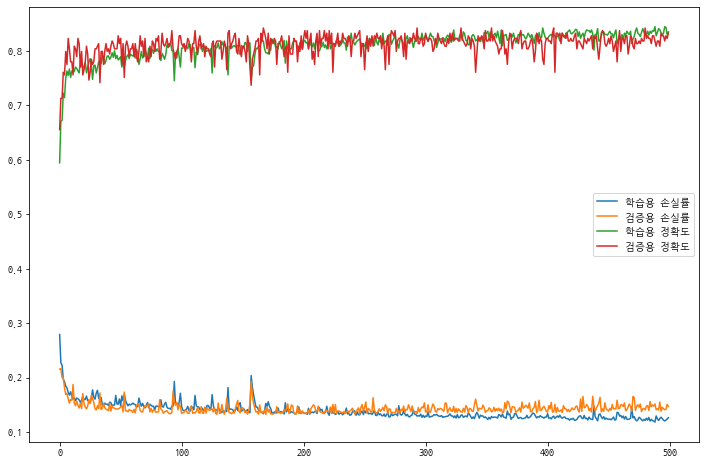

In [58]:
# setp 5. 시각화
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) # 학습용 데이터셋의 손실율
plt.plot(hist.history['val_loss']) # 검증용 데이터셋의 손실율
plt.plot(hist.history['accuracy']) # 학습용 데이터셋의 정확도
plt.plot(hist.history['val_accuracy']) # 학습용 데이터셋의 정확도
plt.legend(['학습용 손실률', '검증용 손실률', '학습용 정확도', '검증용 정확도'])
plt.show()

In [59]:
# step 6. 새로운 값으로 예측
# 객실등급, 성별, 나이, 형제 or 부부의 수, 부모 or 자녀수, 운임
# 낮은 생존률 : 3등석, 남성, 19세, 형제/부부=0, 부모/자녀=0, 낮은요금
person1 = np.array([3.,0.,19.,0.,0.,5.]).reshape(1,6)
# 높은 생존률 : 1등석, 여성, 17세, 약혼자와 탑승, 부모와 탑슨, 높은요금
person2 = np.array([1.,1.,17,1.,2.,100.]).reshape(1,6)

print(model.predict(person1))
print(model.predict(person2))

[[0.1188518]]
[[0.99967206]]


###### 6. 주가예측(시계열데이터분석)

>https://finance.yahoo.com
* 삼성전자 : "005930.KS"
* LG전자 : "066570.KS

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout

In [61]:
# data읽기 전에 null값을 제거하고 로딩(null값이 있다면 에러가 발생)
df = pd.read_csv("../data/deeplearning/005930.KS.csv")
df.shape
df.tail()
data = df.dropna(axis=0)

data.shape
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
207,2020-03-09,56500.0,56500.0,56500.0,56500.0,56500.0,0.0
208,2020-03-10,53800.0,54900.0,53700.0,54600.0,54600.0,32106554.0
209,2020-03-11,54300.0,54400.0,52000.0,52100.0,52100.0,45707281.0
210,2020-03-12,52100.0,52100.0,52100.0,52100.0,52100.0,0.0
247,2020-05-08,49100.0,49350.0,48800.0,48800.0,48800.0,15105356.0


In [62]:
# step 1. 데이터전처리
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [63]:
# 1) 최근 50일자료를 기준으로 익일을 예측
seq_len = 50
sequence_length = seq_len + 1 # 51번째가 예측값
result = []
for index in range(len(mid_prices)-sequence_length):
    result.append(mid_prices[index:index+sequence_length])
print(result[-3:])
len(result)

[array([55250., 54900., 56200., 56150., 55500., 55750., 55100., 56000.,
       56650., 58000., 59000., 59550., 60450., 59250., 59850., 61500.,
       62250., 61800., 61500., 61250., 58850., 59250., 57800., 57400.,
       56300., 57900., 59550., 60400., 60450., 59450., 60200., 60200.,
       61050., 61050., 61600., 60300., 59900., 60450., 59150., 57450.,
       57100., 56500., 56200., 54850., 54550., 56000., 56100., 57350.,
       56700., 56500., 54300.]), array([54900., 56200., 56150., 55500., 55750., 55100., 56000., 56650.,
       58000., 59000., 59550., 60450., 59250., 59850., 61500., 62250.,
       61800., 61500., 61250., 58850., 59250., 57800., 57400., 56300.,
       57900., 59550., 60400., 60450., 59450., 60200., 60200., 61050.,
       61050., 61600., 60300., 59900., 60450., 59150., 57450., 57100.,
       56500., 56200., 54850., 54550., 56000., 56100., 57350., 56700.,
       56500., 54300., 53200.]), array([56200., 56150., 55500., 55750., 55100., 56000., 56650., 58000.,
       590

160

In [64]:
# 2) 데이터정규화
nomalized_data = []
for window in result:
    # 첫번째값을 0으로 설정, 즉, 자기자신 / 자기자신 - 1 = 0
    # 두번째값은 두번쨰값 / 첫번쨰값 - 1 = 결과값
    # 계속진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    nomalized_data.append(nomalized_window)
    
result = np.array(nomalized_data)
result

array([[ 0.        , -0.02638967, -0.03537339, ...,  0.04604155,
         0.03649635,  0.03425042],
       [ 0.        , -0.00922722, -0.01326413, ...,  0.06459054,
         0.06228374,  0.07900807],
       [ 0.        , -0.00407451, -0.01746217, ...,  0.07217695,
         0.08905704,  0.09313155],
       ...,
       [ 0.        , -0.00633484,  0.01719457, ...,  0.02624434,
         0.02262443, -0.01719457],
       [ 0.        ,  0.02367942,  0.02276867, ...,  0.0291439 ,
        -0.01092896, -0.03096539],
       [ 0.        , -0.00088968, -0.01245552, ..., -0.03380783,
        -0.05338078, -0.07295374]])

In [65]:
# 3) 데이타셋준비 = 9:1
row = int(round(result.shape[0]*0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train.shape # 2차원 배열
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:,-1]
x_train.shape # 3차원 배열

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:,-1]
x_train.shape, x_test.shape

((144, 50, 1), (16, 50, 1))

In [66]:
# step 2. 모델생성
model = Sequential()
model.add(LSTM(50, input_shape=(50,1), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile('rmsprop', 'mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50, 64)            29440     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50, 64)            33024     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 65        
Total params: 138,977
Trainable params: 138,977
Non-trainable params: 0
_______________________________________________

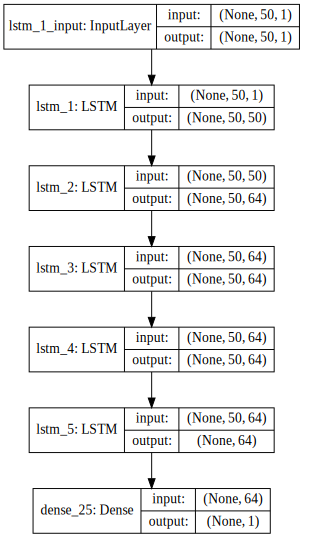

In [67]:
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [68]:
# step 3. 모델훈련
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=20)

Train on 144 samples, validate on 16 samples
Epoch 1/20
144/144 [==============================] - 3s 19ms/step - loss: 0.0119 - val_loss: 0.0081
Epoch 2/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0175
Epoch 3/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0040 - val_loss: 0.0087
Epoch 4/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0026 - val_loss: 0.0037
Epoch 5/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0035 - val_loss: 0.0058
Epoch 6/20
144/144 [==============================] - ETA: 0s - loss: 0.003 - 1s 6ms/step - loss: 0.0032 - val_loss: 0.0031
Epoch 7/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0024 - val_loss: 0.0086
Epoch 8/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0024 - val_loss: 0.0056
Epoch 9/20
144/144 [==============================] - 1s 6ms/step - loss: 0.0026 - val_loss: 0.0073
Epoch 10/20
144/144 [=========

In [69]:
# step 4. 예측
pred = model.predict(x_test)
pred

array([[0.1953878 ],
       [0.18607925],
       [0.17316122],
       [0.16748966],
       [0.15110733],
       [0.12545778],
       [0.09875668],
       [0.08739468],
       [0.06247532],
       [0.05056157],
       [0.04915023],
       [0.0525785 ],
       [0.05851006],
       [0.06819149],
       [0.07564242],
       [0.06395947]], dtype=float32)

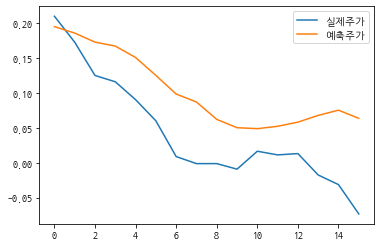

In [70]:
# step 5. 시각화
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y_test, label="실제주가")
ax.plot(pred, label="예축주가")
ax.legend()
plt.show()

##### C. 심층신경망(DNN)
###### 1. mnist
* 필기체 이미지를 분류작업을 `DNN(Deep Neural Network)`
* 심층신경망은 은닉층을 많이 쌓아서 만든 인공신경망
* 학습데이터가 적거나 복잡한 이미지에 더 우수한 성능을 보이는 기법

In [71]:
import os
from keras.utils import np_utils
from keras import layers, models, datasets
import seaborn as sns
sns.set(style='white', font_scale=1.2)
sns.set_style('ticks')

In [72]:
# 데이터준비
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
print("원래데이터=", y_train[:10])

# 원핫인코딩
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

L, W, H = X_train.shape
# -1 : 샘픙의 갯수, 즉 3차원을 2차원으로 축소
X_train = X_train.reshape(-1, W*H) # (60000, 28, 28) -> (60000, 784)
X_test = X_test.reshape(-1, W*H) # (10000, 28, 28) -> (10000, 784)

# 데이터표준화
X_train = X_train / 255.0
X_test = X_test / 255.0

# 변환된 데이터
print("변환데이터=", y_train[:10])

원래데이터= [5 0 4 1 9 2 1 3 1 4]
변환데이터= [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [73]:
# 분류DNN함수 (모델구현)
def make_model(input_number, hidden_layers, output_number):
    # 모델초기화
    model = Sequential()
    # 1st은닉층
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_number, ), name='Hidden-1'))
    # 2nd은닉층
    model.add(Dense(hidden_layers[1], activation='relu', name='Hidden-2'))
    # drop-out층 : (Dropout(p) p라는 확률로 출력노드의 신호를 끊어준다. 과적합방지
    model.add(Dropout(0.2))
    # 출력층
    model.add(Dense(output_number, activation='softmax'))
    # 모델컴파일
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [74]:
input_number = 784
hidden_layers = [100, 50] # 은닉층2개에 각각의 노드가 100개, 50개
number_of_class = 10
output_number = 10

In [75]:
# 모델생성 & 학습
model = make_model(input_number, hidden_layers, output_number)
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.4384 - accuracy: 0.8708 - val_loss: 0.1768 - val_accuracy: 0.9508
Epoch 2/5
48000/48000 [==============================] - 1s 26us/step - loss: 0.1866 - accuracy: 0.9457 - val_loss: 0.1382 - val_accuracy: 0.9582
Epoch 3/5
48000/48000 [==============================] - 1s 26us/step - loss: 0.1370 - accuracy: 0.9593 - val_loss: 0.1139 - val_accuracy: 0.9654
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1056 - accuracy: 0.9690 - val_loss: 0.0983 - val_accuracy: 0.9718
Epoch 5/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.0860 - accuracy: 0.9744 - val_loss: 0.0953 - val_accuracy: 0.9703


In [76]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     
_________________________________________________________________
Hidden-2 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


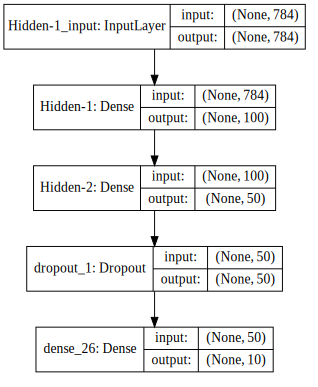

In [77]:
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [78]:
# 모델평가
pred = model.evaluate(X_test, y_test, batch_size=100)
print("손실율과 정확도 ->", pred)

10000/10000 [==============================] - 0s 12us/step
손실율과 정확도 -> [0.09030436709930655, 0.9718000292778015]


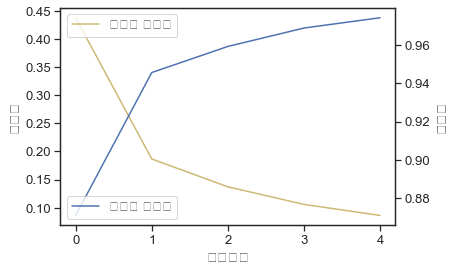

In [79]:
# 모델처리의 시각화
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='훈련용 손실률')
acc_ax.plot(hist.history['accuracy'], 'b', label='훈련용 정확도')

loss_ax.set_xlabel('학습단계')
loss_ax.set_ylabel('손실률')
acc_ax.set_ylabel('정확도')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [80]:
# 세번째 은닉층을 추가
def make_model(input_number, hidden_layers, output_number):
    model = Sequential()
    model.add(Dense(hidden_layers[0], activation='relu', input_shape=(input_number, ), name='Hidden-1'))
    model.add(Dense(hidden_layers[1], activation='relu', name='Hidden-2'))
    model.add(Dense(hidden_layers[2], activation='relu', name='Hidden-3'))
    model.add(Dropout(0.2))
    model.add(Dense(output_number, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.5229 - accuracy: 0.8447 - val_loss: 0.1907 - val_accuracy: 0.9445
Epoch 2/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.2069 - accuracy: 0.9413 - val_loss: 0.1303 - val_accuracy: 0.9619
Epoch 3/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1492 - accuracy: 0.9577 - val_loss: 0.1236 - val_accuracy: 0.9625
Epoch 4/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.1173 - accuracy: 0.9669 - val_loss: 0.1126 - val_accuracy: 0.9679
Epoch 5/5
48000/48000 [==============================] - 1s 25us/step - loss: 0.0958 - accuracy: 0.9720 - val_loss: 0.1112 - val_accuracy: 0.9682
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Hidden-1 (Dense)             (None, 100)               78500     

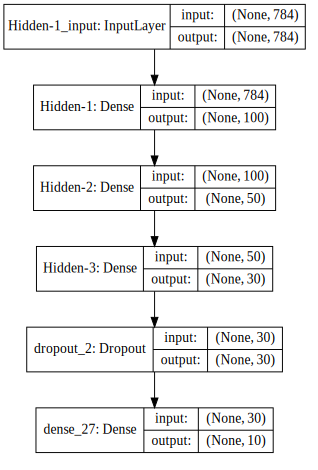

In [81]:
input_number = 784
hidden_layers = [100, 50, 30] # 은닉층3개에 각각의 노드가 100개, 50개, 30개
number_of_class = 10
output_number = 10

model = make_model(input_number, hidden_layers, output_number)
hist = model.fit(X_train, y_train, epochs=5, batch_size=100, validation_split=0.2)
model.summary()
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [82]:
# 은닉층 3개 - 모델평가
pred = model.evaluate(X_test, y_test, batch_size=100)
print("손실율과 정확도 ->", pred)

10000/10000 [==============================] - 0s 11us/step
손실율과 정확도 -> [0.09469484638160793, 0.972100019454956]


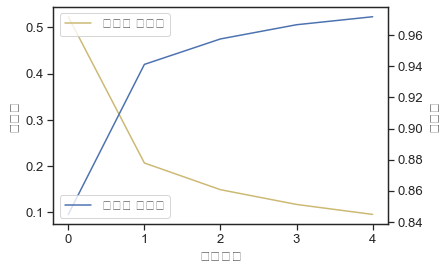

In [83]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(hist.history['loss'], 'y', label='훈련용 손실률')
acc_ax.plot(hist.history['accuracy'], 'b', label='훈련용 정확도')

loss_ax.set_xlabel('학습단계')
loss_ax.set_ylabel('손실률')
acc_ax.set_ylabel('정확도')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

##### D 합성곱신경망(CNN)

>Conv2D(32, (5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu')
>>###### 주요 인자
* 첫번째 인자 : 컨볼루션 필터의 수.
* 두번째 인자 : 컨볼루션 커널의 (행, 열).
* padding : 경계 처리 방법을 정의.
 - valid’ : 유효한 영역만 출력. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작다.
 - same’ : 출력 이미지 사이즈가 입력 이미지 사이즈와 동일.
* input_shape : 샘플 수를 제외한 입력 형태를 정의. 모델에서 첫 레이어일 때만 정의.
 - (행, 열, 채널 수)로 정의합니다. 흑백영상인 경우에는 채널이 1이고, 컬러(RGB)영상인 경우에는 채널을 3으로 설정합니다.
* activation : 활성화 함수 설정합니다.
 - linear’ : 디폴트 값, 입력뉴런과 가중치로 계산된 결과값이 그대로 출력으로 나옵니다.
 - relu’ : rectifier 함수, 은익층에 주로 쓰입니다.
 - sigmoid’ : 시그모이드 함수, 이진 분류 문제에서 출력층에 주로 쓰입니다.
 - softmax’ : 소프트맥스 함수, 다중 클래스 분류 문제에서 출력층에 주로 쓰입니다.





###### 1. mnist 이미지분류

In [84]:
from keras import layers, models

model = Sequential()

# 필터갯수 32, 필터크기 3x3
# 입력데이터 28x28x1(1=흑백이미지, 3=컬러이미지)
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2,2)) # Max-pooling 필터크기 2x2
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten()) # 2차원을 1차원으로
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)              

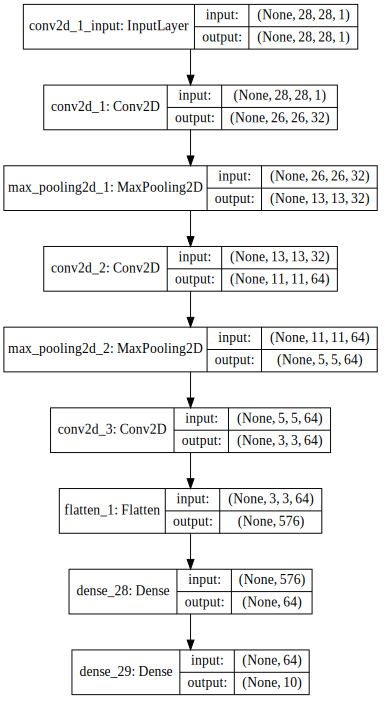

In [85]:
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [86]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 케라스에서 처리할 수 있는 형태대로 변환
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images.astype('float32') / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images.astype('float32') / 255.0

# 원핫인코딩
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [87]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 33s 551us/step - loss: 0.1838 - accuracy: 0.9427
Epoch 2/5
60000/60000 [==============================] - 32s 536us/step - loss: 0.0474 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 31s 509us/step - loss: 0.0329 - accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 30s 507us/step - loss: 0.0258 - accuracy: 0.9920
Epoch 5/5
60000/60000 [==============================] - 32s 527us/step - loss: 0.0206 - accuracy: 0.9936


In [88]:
# 검증용데이터로 모델성능평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_loss, test_acc

10000/10000 [==============================] - 2s 191us/step


(0.027894207256342635, 0.9922999739646912)

###### 2. cifar-10 컬러이미지분류

* http://www.cs.toronto.edu/~kriz/cifar.html
* CIFAR-10 데이터셋 : 10가지의 사물이 담긴 컬러 이미지
* 비행기, 자동차, 새, 고양이, 사슴, 개, 개구리, 말, 배, 트럭
* 6만장(학습용 5만장, 검증용 1만장)
* 32x32x3 : RGB컬러이미지

In [89]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import layers, models
from keras.datasets import cifar10
from keras import datasets
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from six.moves import cPickle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style='white', font_scale=1.2)
sns.set_style('ticks')
plt.rcParams['savefig.dpi'] = 200

In [90]:
# data생성
def make_data():
    (X_train, y_train),(X_test, y_test) = datasets.cifar10.load_data()
    Y_train = keras.utils.to_categorical(y_train, 10)
    Y_test = keras.utils.to_categorical(y_test, 10)
    
    # 정규화
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255.0
    X_test /= 255.0
    return (X_train, Y_train), (X_test, Y_test)

# 모델생성
def make_model():
    model = Sequential()
    # padding='same' : 출력크기를 동일하게 유지
    model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:]))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25)) # 과적합화 방지
    
    model.add(Conv2D(64, (3,3)))
    model.add(Activation('relu'))     
    
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))  
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Dropout(0.25))   
    
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu')) 
    model.add(Dropout(0.5)) 
    
    # 출력층
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    # lr=학습률, decay=학습속도를 감속시키는 옵션
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6) 
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [91]:
# 손실률 시각화
def plot_loss(history, title=None):
    if not isinstance(history, dict):
        history = hist.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])

    if title is not None:
        plt.title(title)
    plt.ylabel('손실률')
    plt.xlabel('학습단계')
    plt.legend(['학습데이터성능', '검증데이터성능'], loc=0)
    
def plot_acc(history, title=None):
    if not isinstance(history, dict):
        history = hist.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])

    if title is not None:
        plt.title(title)
    plt.ylabel('정확도')
    plt.xlabel('학습단계')
    plt.legend(['학습데이터성능', '검증데이터성능'], loc=0)

In [92]:
(X_train, Y_train), (X_test, Y_test) = make_data()

170500096/170498071 [==============================] - 109s 1us/step


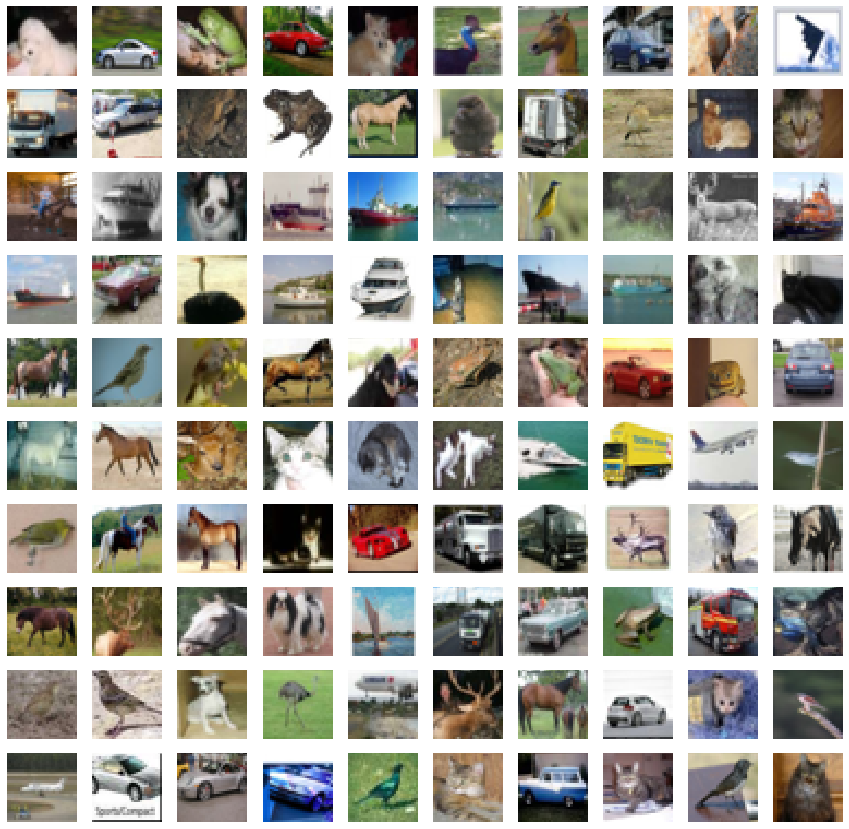

In [93]:
f = open('C:/Users/TJOEUN-JR/.keras/datasets/cifar-10-batches-py/data_batch_1', 'rb')
datadict = cPickle.load(f, encoding='latin1')
X = datadict['data']
Y = datadict['labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype('uint8')
Y = np.array(Y)

fig, axes1 = plt.subplots(10,10,figsize=(15,15))
for j in range(10):
    for k in range(10):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])

In [94]:
hidden_nodes = [100, 50]
dropout_rates = [0.05, 0.5]
number_of_class = 10
output_numbers = number_of_class
model = make_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 64)      

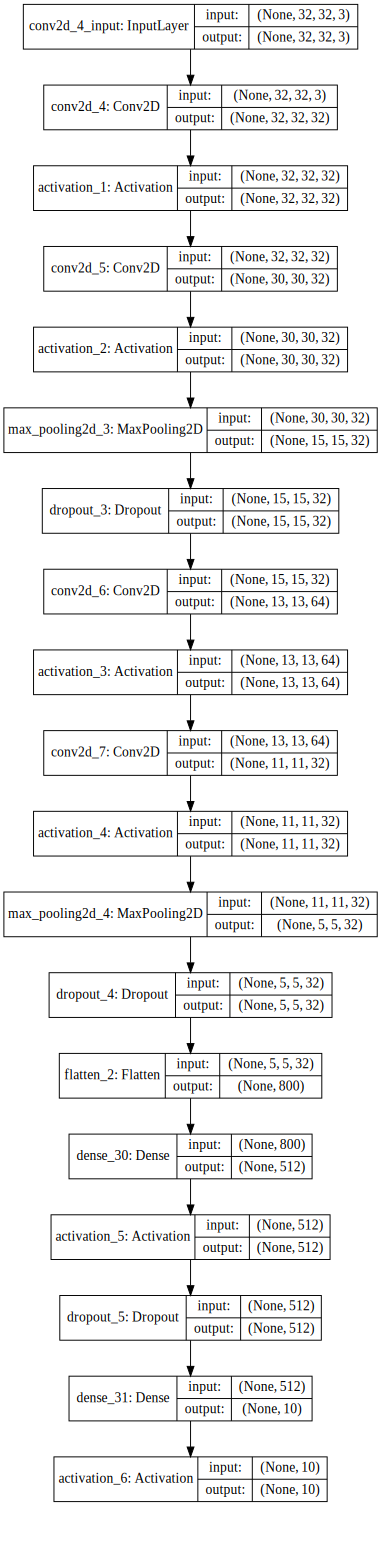

In [95]:
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [96]:
history = model.fit(X_train, Y_train, epochs=3, batch_size=32, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
40000/40000 [==============================] - 114s 3ms/step - loss: 1.9747 - accuracy: 0.2654 - val_loss: 1.6881 - val_accuracy: 0.3910
Epoch 2/3
40000/40000 [==============================] - 113s 3ms/step - loss: 1.6536 - accuracy: 0.3927 - val_loss: 1.6036 - val_accuracy: 0.4217
Epoch 3/3
40000/40000 [==============================] - 110s 3ms/step - loss: 1.5246 - accuracy: 0.4423 - val_loss: 1.4114 - val_accuracy: 0.4935


In [97]:
pred = model.evaluate(X_test, Y_test, batch_size=100)
print(pred)

10000/10000 [==============================] - 9s 897us/step
[1.3983082473278046, 0.49070000648498535]


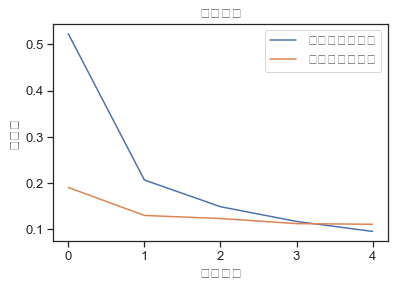

In [98]:
# 시각화
plot_loss(history, '손실추이')
plt.show()

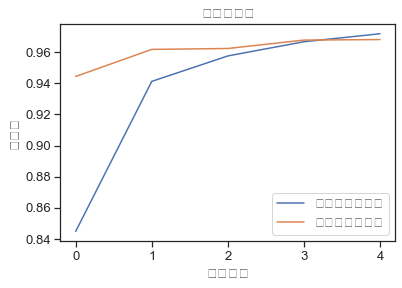

In [99]:
plot_acc(history, '정확도추이')
plt.show()

10000/10000 [==============================] - 9s 879us/step


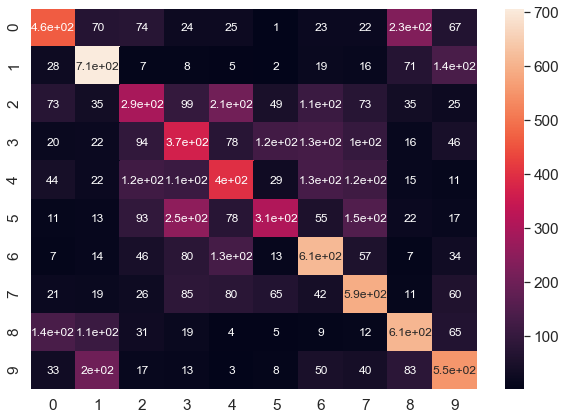

In [100]:
Y_pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
df_cm = pd.DataFrame(cm, range(10), range(10))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={'size':12})
plt.show()